In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('sample_data/heart.csv')

# 🧾 Heart Disease Dataset — Columns Explanation  

### **age**  
- patients age
### **sex**
- `0` = female
- `1` = male  

### **cp** (chest pain type)  
- `0` = Typical angina (classic chest pain due to heart issue)  
- `1` = Atypical angina (chest pain but not typical heart-related)  
- `2` = Non-anginal pain (pain not related to heart)  
- `3` = Asymptomatic (no chest pain at all)  
- Think of this as *what symptoms the patient came with*.  

### **trestbps** (resting blood pressure)  
- Measured in mm Hg (millimeters of mercury).  
- Normal is ~120. Higher means more strain on heart.  

### **chol** (serum cholesterol)  
- Measured in mg/dl (milligrams per deciliter).  
- High cholesterol → risk of artery blockage.  

### **fbs** (fasting blood sugar)  
- `1` if fasting blood sugar > 120 mg/dl, else `0`.  
- Rough check if patient might be diabetic.  

### **restecg** (resting electrocardiogram results)  
- `0` = Normal  
- `1` = ST-T wave abnormality (could indicate heart stress)  
- `2` = Left ventricular hypertrophy (heart’s left chamber is thickened)  
- Quick test of heart’s electrical activity.  

### **thalach** (maximum heart rate achieved)  
- Higher is usually better (shows fitness), lower may indicate risk.  

### **exang** (exercise induced angina)  
- `1` = Yes, chest pain during exercise  
- `0` = No  
- Shows whether physical stress triggers heart issues.  

### **oldpeak**  
- Depression of ST segment in ECG test after exercise.  
- Higher values usually = higher risk.  
- Think of it as how much stress test shows abnormality.  

### **slope** (slope of the peak exercise ST segment)  
- `0` = Downsloping (bad, indicates risk)  
- `1` = Flat (some risk)  
- `2` = Upsloping (better, normal response)  
- Describes how the ECG graph looks under exercise.  

### **ca** (number of major vessels colored by fluoroscopy)  
- Value = 0, 1, 2, 3 → number of blood vessels visible.  
- More visible = better circulation.  

### **thal** (Thalassemia test result)  
- `1` = Fixed defect (damage, no blood flow)  
- `2` = Normal  
- `3` = Reversible defect (blood flow is reduced under stress)  
- Special scan of blood flow.  

### **target**  
- `1` = Patient has heart disease  
- `0` = Patient does **NOT** have heart disease  
- This is the **label** (what we want to analyze/predict).  


In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

### Check null values in dataset

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Remove duplicate rows
- 70.53% data is duplicate

In [ ]:
(df[df.duplicated()].shape[0]/df.shape[0])*100

70.53658536585365

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# Column Types
**Numerical sensors** : age, trestbps, chol, thalach, oldpeak

**Categorical encodings**:  sex, fbs, exang, target, cp, restecg, slope, ca, thal

# Analysis on Numerical columns

## Age column
### Conclusions:
- Age is approximately normally distributed with a very slight left skew (skewness = -0.20).
- No significant outliers detected in boxplot.
- mean is at 54.42053
- median is at 55.5

In [ ]:
age=df['age']
age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [ ]:
age.median()

55.5

<Axes: ylabel='Frequency'>

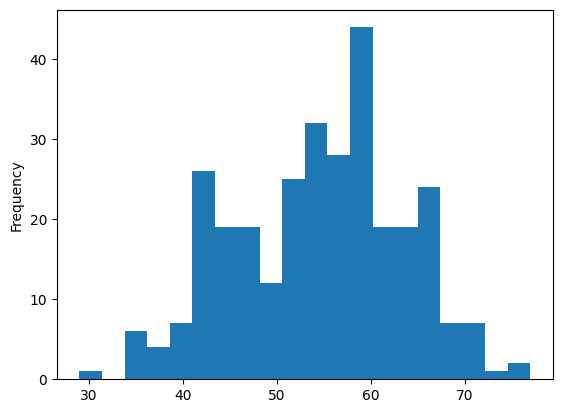

In [ ]:
age.plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

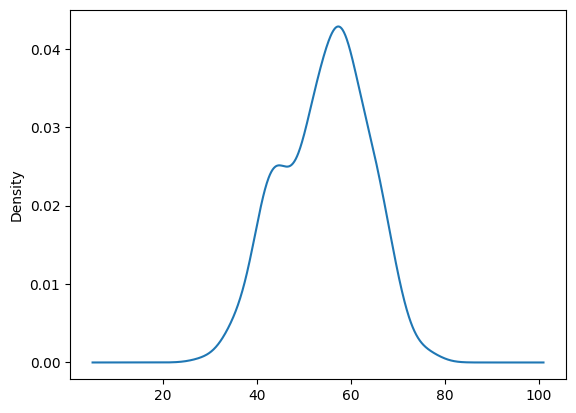

In [ ]:
age.plot(kind='kde')

In [ ]:
age.skew()

np.float64(-0.20374327959596905)

<Axes: >

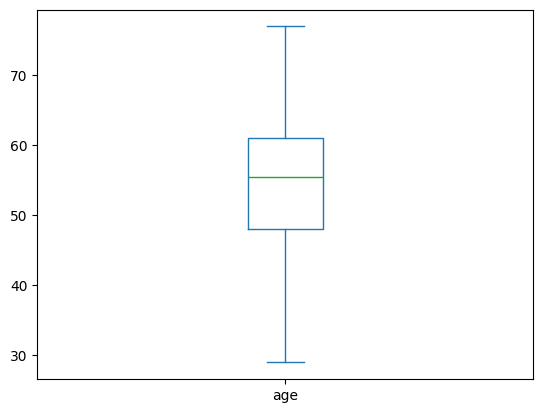

In [ ]:
age.plot(kind='box')

## trestbps
#### **Conclusions:**
- Moderately right-skewed (0.72), indicating a slight concentration of patients with lower resting blood pressure and a few with very high values.
- boxplot indicates some outliers having trestbps > 170
- mean is at 131.602649
- median is at 130.0

In [ ]:
trestbps=df['trestbps']

In [ ]:
trestbps.describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
trestbps.median()

130.0

<Axes: ylabel='Frequency'>

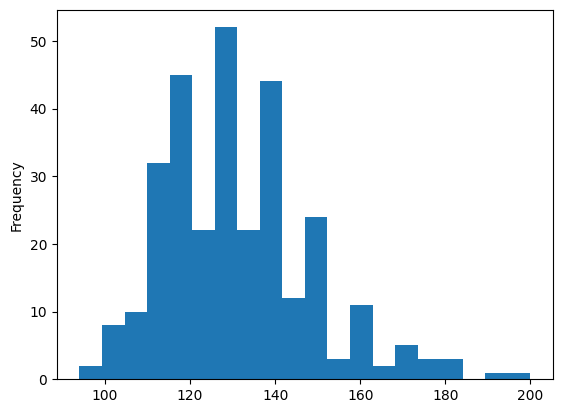

In [ ]:
trestbps.plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

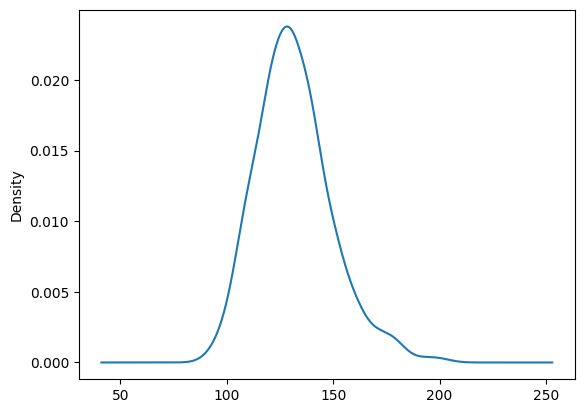

In [ ]:
trestbps.plot(kind='kde')

In [ ]:
trestbps.skew()

np.float64(0.7165414326647316)

<Axes: >

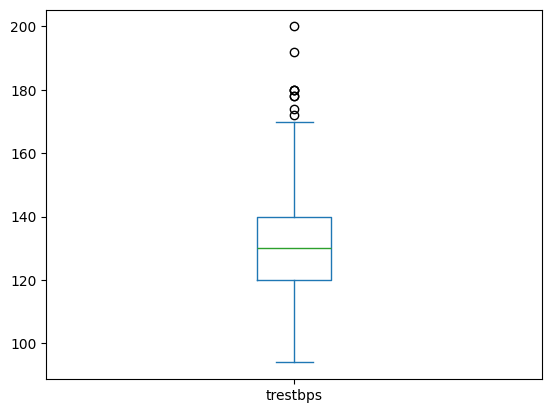

In [ ]:
trestbps.plot(kind='box')

In [ ]:
df[trestbps>170]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
29    55    0   0       180   327    0        2      117      1      3.4   
47    66    0   0       178   228    1        1      165      1      1.0   
87    59    0   0       174   249    0        1      143      1      0.0   
137   64    0   0       180   325    0        1      154      1      0.0   
151   54    1   1       192   283    0        0      195      0      0.0   
175   56    0   0       200   288    1        0      133      1      4.0   
343   52    1   2       172   199    1        1      162      0      0.5   
396   68    1   2       180   274    1        0      150      1      1.6   
528   59    1   3       178   270    0        0      145      0      4.2   

     slope  ca  thal  target  
29       1   0     2       0  
47       1   2     3       0  
87       1   0     2       0  
137      2   0     2       1  
151      2   1     3       0  
175      0   2     3       0  
343      2   0     3       1  
396      1   0     3       0  
528      0   0     3       1

📊 Column: chol
count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

Skewness: 1.147332413980798
Median: 240.5
Standard deviation: 51.75348865574056



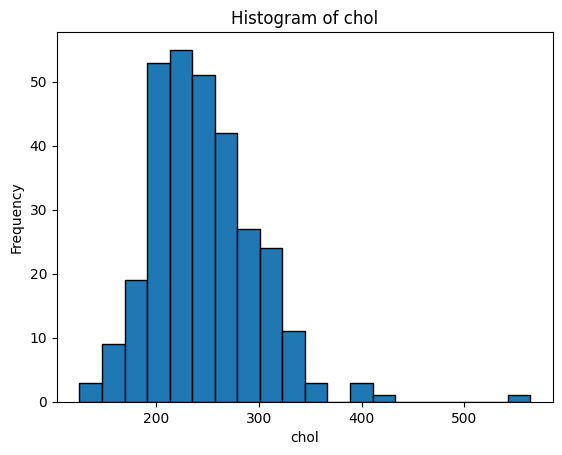

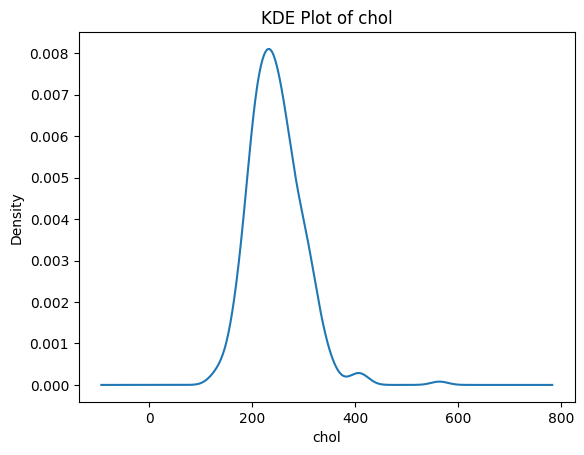

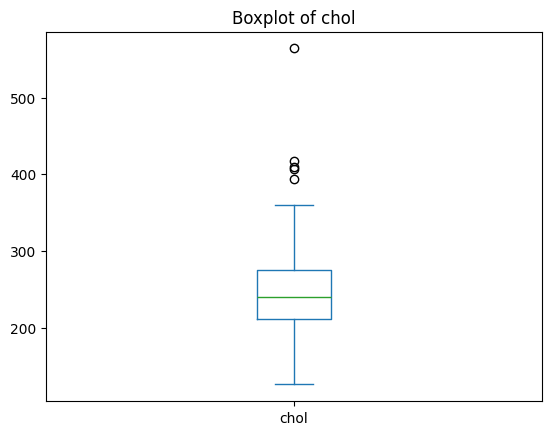

--------------------------------------------------

📊 Column: thalach
count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

Skewness: -0.5326712468229613
Median: 152.5
Standard deviation: 22.903527251969837



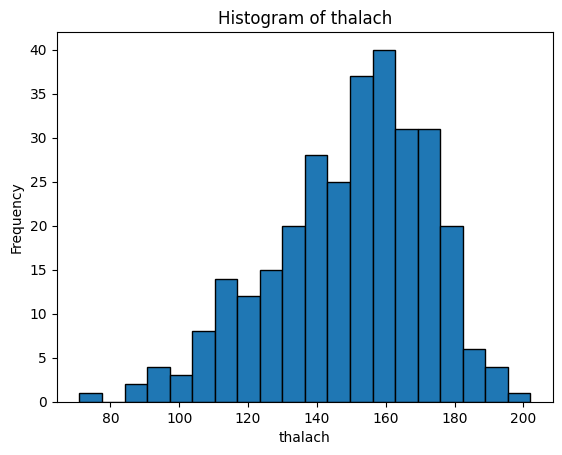

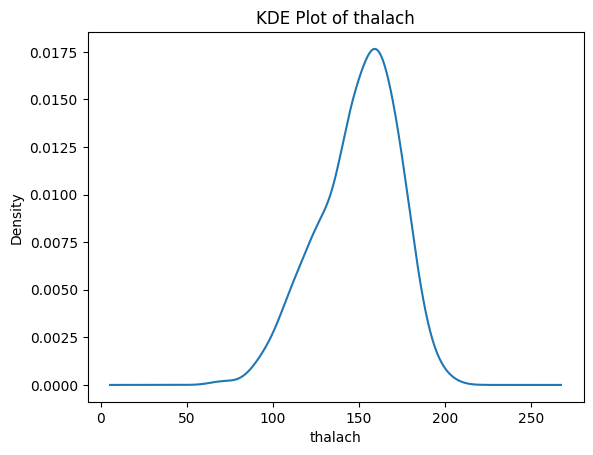

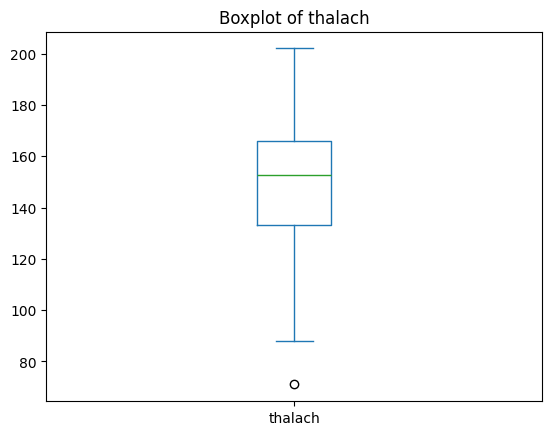

--------------------------------------------------

📊 Column: oldpeak
count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Skewness: 1.266172720910219
Median: 0.8
Standard deviation: 1.161452289063457



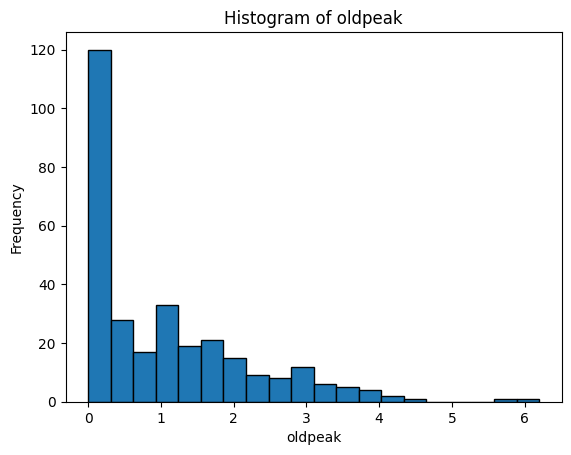

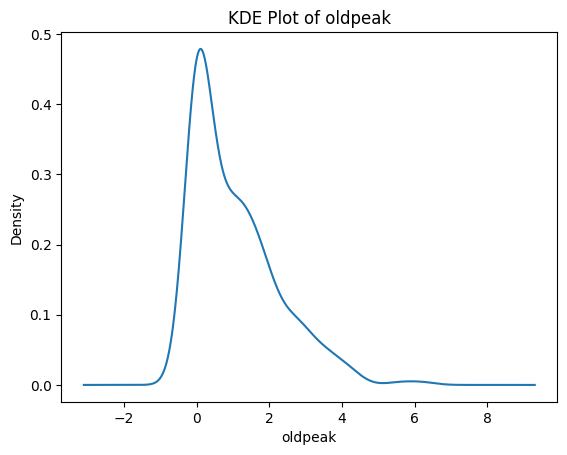

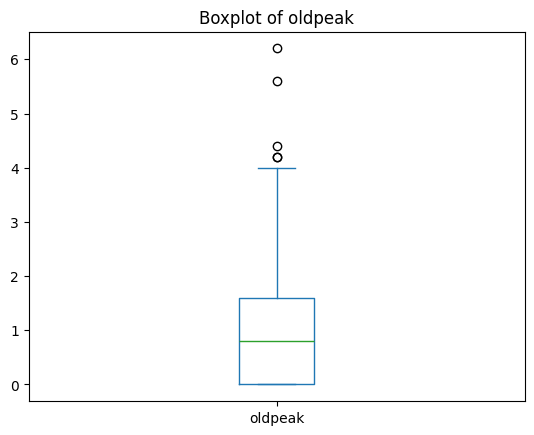

--------------------------------------------------



In [ ]:

def explore_column(df, col):
    print(f"📊 Column: {col}")
    print(df[col].describe())
    print()
    print("Skewness:", df[col].skew())
    print("Median:", df[col].median())
    print('Standard deviation:',df[col].std())
    print()


    # Histogram
    df[col].plot(kind='hist', bins=20, title=f"Histogram of {col}", edgecolor='black')
    plt.xlabel(col)
    plt.show()
    print()

    # KDE Plot
    df[col].plot(kind='kde', title=f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.show()
    print()

    # Boxplot
    df[col].plot(kind='box', title=f"Boxplot of {col}")
    plt.show()
    print("-"*50)
    print()


for column in ['chol', 'thalach', 'oldpeak']:
    explore_column(df, column)

## chol
#### **Conclusions:**
- chol is Highly right skewed
- boxplot indicates that there are some outliers above chol > 370
- mean is at 246.5
- Median: 240.5

In [ ]:
chol=df['chol']

In [ ]:
df[chol>370]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   

     slope  ca  thal  target  
123      2   1     2       1  
158      1   0     3       1  
179      1   2     3       0  
255      1   0     2       1  
450      1   3     3       0

## thalach
#### **Conclusions:**
- thalach is moderately left-skewed (skewness = -0.53).
- The boxplot shows one outlier, where thalach < 80.
- Mean: 149.57
- Median: 152.5

In [ ]:
thalach=df['thalach']
df[thalach<80]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
267   67    1   0       120   237    0        1       71      0      1.0   

     slope  ca  thal  target  
267      1   0     2       0

## oldpeak
#### **Conclusions:**
- The distribution is highly right-skewed.
- Outliers are present for values above oldpeak > 4.
- Mean: 1.04
- Median: 0.80
- data does not follow log-normal distribution

In [ ]:
#Shapiro wilk test to check if data follows log-normal distribution
from scipy.stats import shapiro

stat, p = shapiro(np.log1p(df['oldpeak']))
print('p-value:', p)
if p > 0.05:
    print("Log-transformed data is likely normal → original is log-normal")
else:
    print("Log-transformed data not normal")


p-value: 7.157980303323159e-14
Log-transformed data not normal


In [ ]:
oldpeak=df['oldpeak']
df[oldpeak>4]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
6     58    1   0       114   318    0        2      140      0      4.4   
13    51    1   0       140   298    0        1      122      1      4.2   
54    55    1   0       140   217    0        1      111      1      5.6   
69    62    0   0       160   164    0        0      145      0      6.2   
528   59    1   3       178   270    0        0      145      0      4.2   

     slope  ca  thal  target  
6        0   3     1       0  
13       1   3     3       0  
54       0   0     3       0  
69       0   3     3       0  
528      0   0     3       1

# Analysis on Categorical cols

## sex
#### **Conclusions:**
- There are 68.2% males (207) and 31.8% females (97)
- No missing values
- Column is moderately imbalanced (males dominate)

In [ ]:
sex=df['sex']

<Axes: xlabel='sex'>

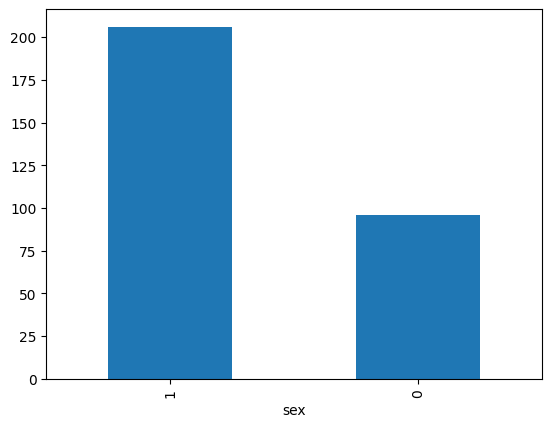

In [ ]:
sex.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

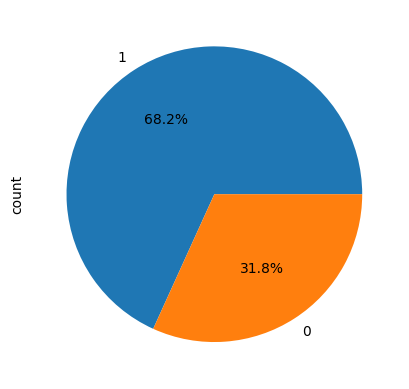

In [ ]:
sex.value_counts().plot(kind='pie',autopct='%0.1F%%')

### Checking for missing values

In [ ]:
sex.isnull().sum()

np.int64(0)

FBS Value Counts:
fbs
0    257
1     45
Name: count, dtype: int64


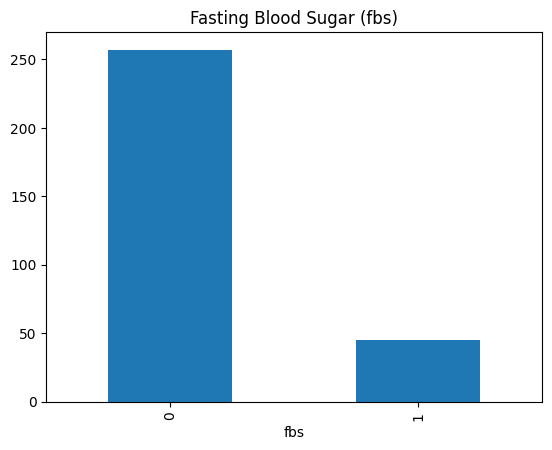

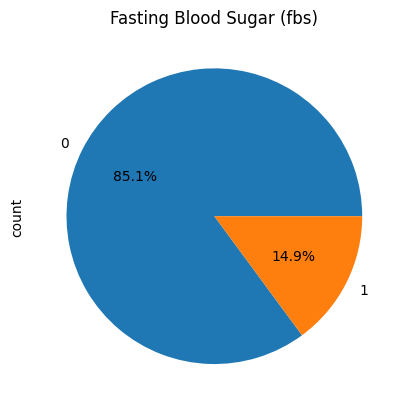

Missing values in fbs: 0


Exang Value Counts:
exang
0    203
1     99
Name: count, dtype: int64


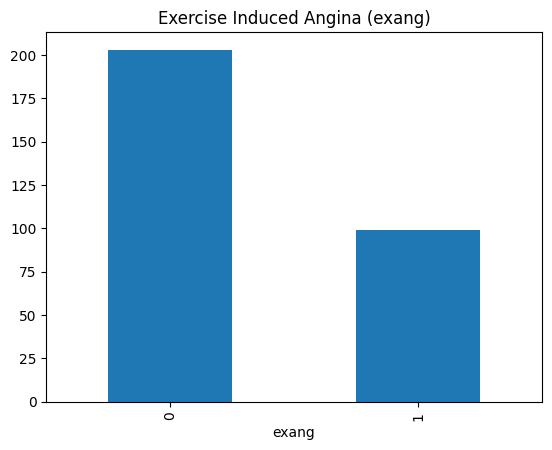

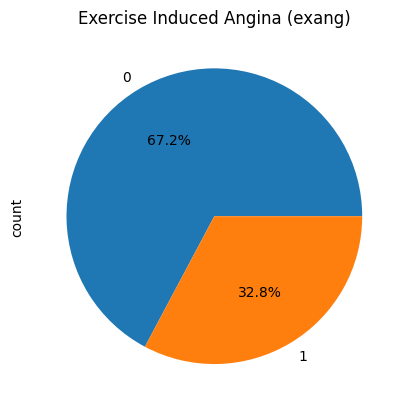


Missing values in exang: 0


In [ ]:
#fbs (fasting blood sugar)
print("FBS Value Counts:")
print(df['fbs'].value_counts())

df['fbs'].value_counts().plot(kind='bar', title="Fasting Blood Sugar (fbs)")
plt.show()
print()

df['fbs'].value_counts().plot(kind='pie', autopct='%0.1f%%', title="Fasting Blood Sugar (fbs)")
plt.show()

print("Missing values in fbs:", df['fbs'].isnull().sum())
print()


#exang (exercise induced angina)
print("\nExang Value Counts:")
print(df['exang'].value_counts())

df['exang'].value_counts().plot(kind='bar', title="Exercise Induced Angina (exang)")
plt.show()
print()

df['exang'].value_counts().plot(kind='pie', autopct='%0.1f%%', title="Exercise Induced Angina (exang)")
plt.show()
print()

print("Missing values in exang:", df['exang'].isnull().sum())


## fbs (Fasting Blood Sugar > 120 mg/dl)
#### **Conclusions:**
- 85.1% of people have `fbs = 0` (fasting blood sugar ≤ 120 mg/dl)
- 14.9% of people have `fbs = 1` (fasting blood sugar > 120 mg/dl)
- No missing values
- Column is highly imbalanced (most people have normal fasting blood sugar)
- Binary categorical variable (0/1)

## exang (Exercise Induced Angina)
#### **Conclusions:**
- 67.2% of people have `exang = 0` (no exercise-induced angina)
- 32.8% of people have `exang = 1` (exercise-induced angina present)
- No missing values
- Column is moderately imbalanced (majority do not experience exercise-induced angina)
- Binary categorical variable (0/1)


===== CP =====
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


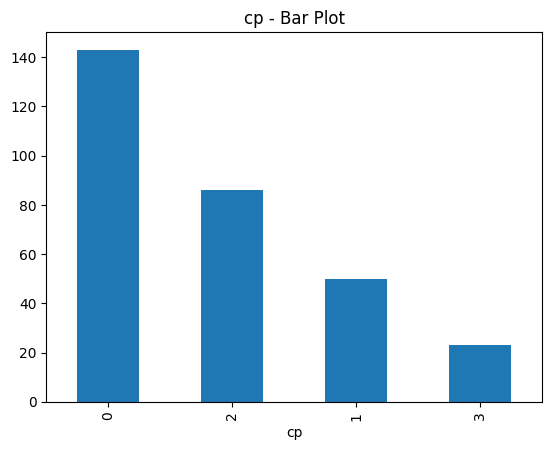

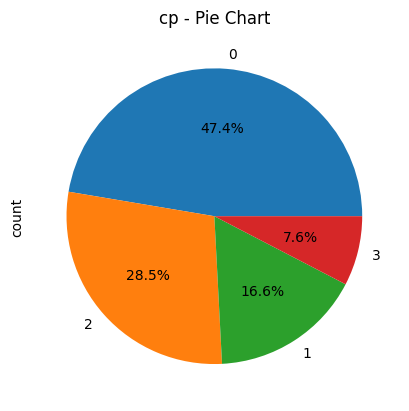


Missing values in cp: 0

===== RESTECG =====
restecg
1    151
0    147
2      4
Name: count, dtype: int64


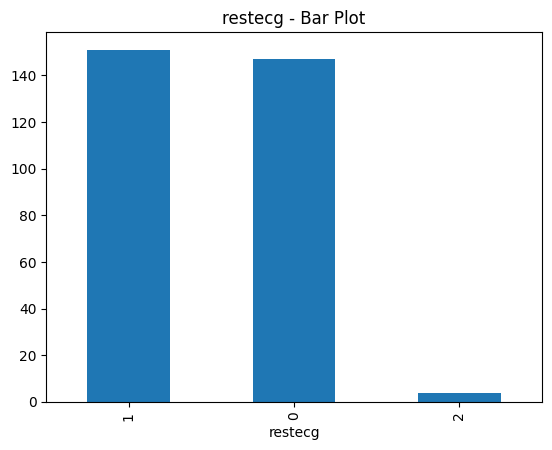

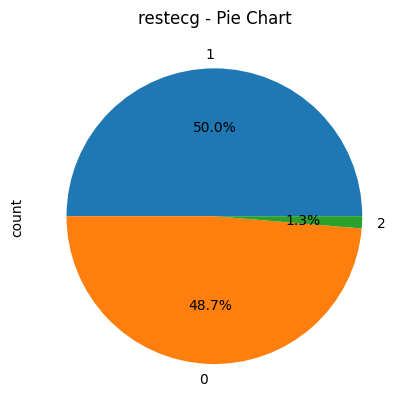


Missing values in restecg: 0

===== SLOPE =====
slope
2    141
1    140
0     21
Name: count, dtype: int64


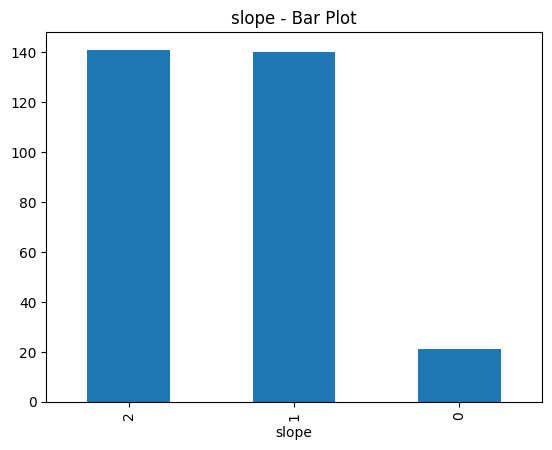

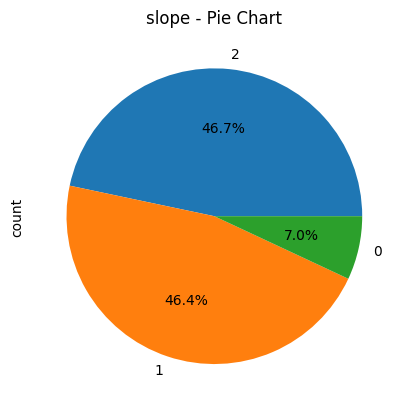


Missing values in slope: 0

===== CA =====
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


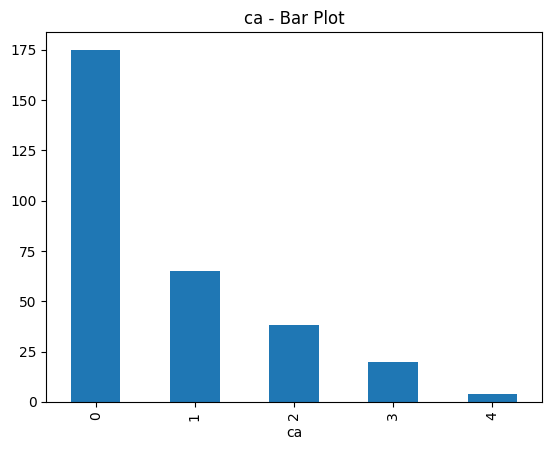

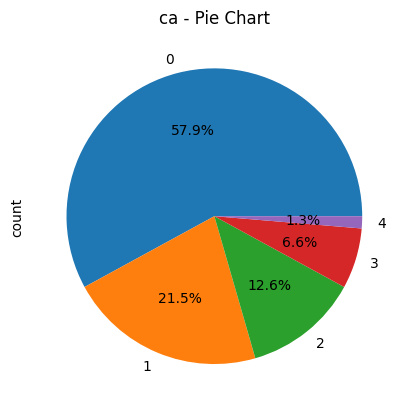


Missing values in ca: 0

===== THAL =====
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64


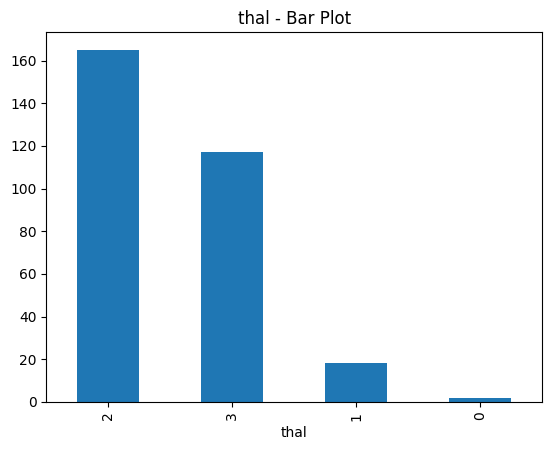

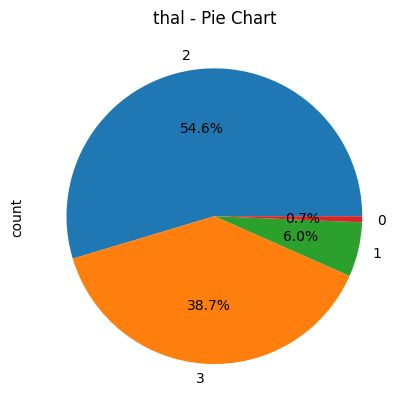


Missing values in thal: 0


In [ ]:
import matplotlib.pyplot as plt

categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

for col in categorical_cols:
    print(f"\n===== {col.upper()} =====")
    print(df[col].value_counts())

    # Bar plot
    df[col].value_counts().plot(kind='bar', title=f"{col} - Bar Plot")
    plt.show()
    print()

    # Pie chart
    df[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=f"{col} - Pie Chart")
    plt.show()
    print()

    # Missing values
    print(f"Missing values in {col}: {df[col].isnull().sum()}")


## cp (Chest Pain Type)
#### **Conclusions:**
- Most people have `cp = 0` (Typical angina), followed by `cp = 2` (Non-anginal pain), `cp = 1` (Atypical angina), and `cp = 3` (Asymptomatic)
- No missing values
- Multi-class categorical variable (4 unique values: 0–3)
- Column is imbalanced, with typical angina (cp=0) being the most common type
- Distribution order (by frequency): 0 > 2 > 1 > 3


## restecg (Resting Electrocardiographic Results)
#### **Conclusions:**
- `restecg = 1` (ST–T wave abnormality) is the most frequent (50%)
- `restecg = 0` (Normal ECG) is slightly less common (48.7%)
- `restecg = 2` (Left Ventricular Hypertrophy) is very rare (1.3%)
- No missing values
- Multi-class categorical variable (3 unique values: 0, 1, 2)
- Distribution is highly imbalanced, with class 2 occurring very rarely

## slope (Slope of the Peak Exercise ST Segment)
#### **Conclusions:**
- `slope = 2` (Upsloping) is the most frequent (46.7%)
- `slope = 1` (Flat) is almost equally common (46.4%)
- `slope = 0` (Downsloping) is the least frequent (7%)
- No missing values
- Multi-class categorical variable (3 unique values: 0, 1, 2)
- Dataset is imbalanced for this column, as downsloping (0) occurs rarely (only 7%)


## thal (Thalassemia Test Result)
#### **Conclusions:**
- `thal = 2` (Normal) is the most common (54.6%)
- `thal = 3` (Reversible Defect) is second most common (38.7%)
- `thal = 1` (Fixed Defect) is rare (6.0%)
- `thal = 0` is extremely rare (0.7%) – may represent missing or unknown data in some datasets
- No missing values
- Multi-class categorical variable (4 unique values: 0–3)
- **Risk Insight:** Patients with `thal = 3` (reversible defect) or `thal = 1` (fixed defect) may have a higher risk of heart disease compared to `thal = 2` (normal)
- Moderately imbalanced, with normal thalassemia (2) dominating the distribution


## ca (Number of Major Vessels Colored by Fluoroscopy)
#### **Conclusions:**
- `ca = 0` is the most frequent category (57.9%)
- `ca = 1` is 21.5%, `ca = 2` is 12.6%, `ca = 3` is 6.6%, and `ca = 4` is very rare (≈1.3% – special case)
- No missing values
- Multi-class categorical variable (5 unique values: 0–4)
-- **Risk Insight:** Higher `ca` values (3–4) usually indicate more blocked vessels → likely higher risk of heart disease. `ca = 0` likely represents low risk.
- Highly imbalanced, with `ca = 0` dominating the distribution

# Bivariate Analysis (Categorical vs Categorical)

## Target vs Sex
#### **Conclusions:**
- Cross-tab analysis shows that:
  - Among females (`sex = 0`), **75%** are in the heart disease group (`target = 1`) and **25%** are not (`target = 0`) → strong imbalance.
  - Among males (`sex = 1`), **55.3%** are without heart disease (`target = 0`) and **44.7%** have heart disease (`target = 1`) → relatively balanced.
- TreeMap visualization confirms that:
  - `sex = 1 & target = 0` has the maximum count.
  - Followed by `sex = 1 & target = 1`, then `sex = 0 & target = 1`.
- **Risk Insight:** Females in this dataset appear to have a **higher risk** of heart disease compared to males.


In [ ]:
pd.crosstab(df['target'],df['sex'],normalize='columns')*100

sex        0          1
target                 
0       25.0  55.339806
1       75.0  44.660194

<Axes: xlabel='sex', ylabel='target'>

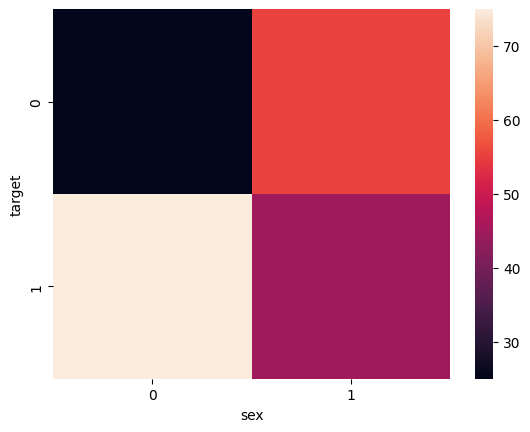

In [ ]:
sns.heatmap(pd.crosstab(df['target'],df['sex'],normalize='columns')*100)

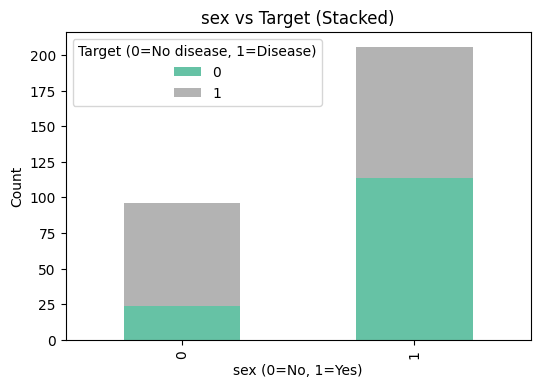

In [ ]:
ct = pd.crosstab(df['sex'], df['target'])

# Plot stacked bar
ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap="Set2")
plt.title("sex vs Target (Stacked)")
plt.xlabel("sex (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Target (0=No disease, 1=Disease)")
plt.show()


In [ ]:
!pip install squarify

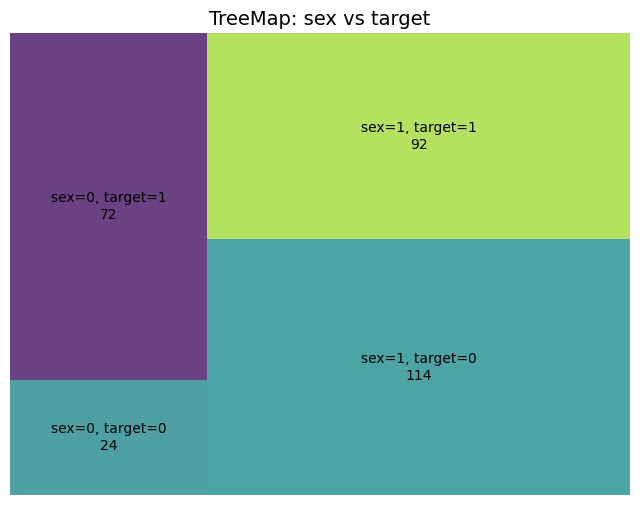

In [ ]:

import squarify# Example: group data by sex and target
grouped = df.groupby(['sex', 'target']).size().reset_index(name='count')

# Prepare labels and sizes for treemap
labels = [f"sex={row['sex']}, target={row['target']}\n{row['count']}" for _, row in grouped.iterrows()]
sizes = grouped['count'].values

# Plot TreeMap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title("TreeMap: sex vs target", fontsize=14)
plt.axis('off')
plt.show()


## **Target vs FBS – Conclusions**
- **Equal Risk:** Crosstab shows that both `fbs=0` and `fbs=1` groups have a similar proportion of individuals with heart disease  
  - `fbs=0 → 54.86%` have heart disease (`target=1`)  
  - `fbs=1 → 51.11%` have heart disease (`target=1`)  
- **Distribution:**  
  - **fbs=0 & target=1** has the highest number of records, followed by **fbs=0 & target=0**.  
  - Together, these two categories cover **almost 80% of the dataset**.
- **Engineering Insight:**  
  - Since high fasting blood sugar (fbs=1) does not show a significantly higher prevalence of heart disease, **fbs may not be a strong predictor** in this dataset.


In [ ]:
pd.crosstab(df['target'],df['fbs'],normalize='columns')*100

fbs             0          1
target                      
0       45.136187  48.888889
1       54.863813  51.111111

<Axes: xlabel='fbs', ylabel='target'>

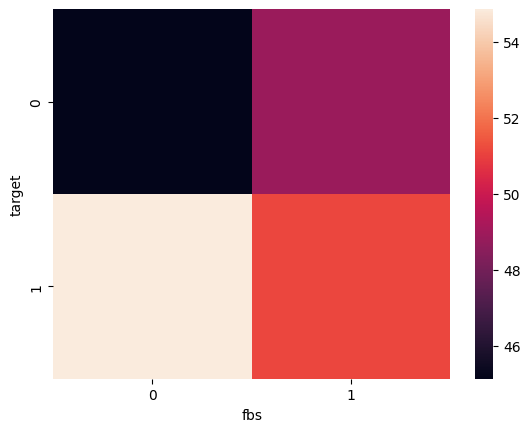

In [ ]:
sns.heatmap(pd.crosstab(df['target'],df['fbs'],normalize='columns')*100)

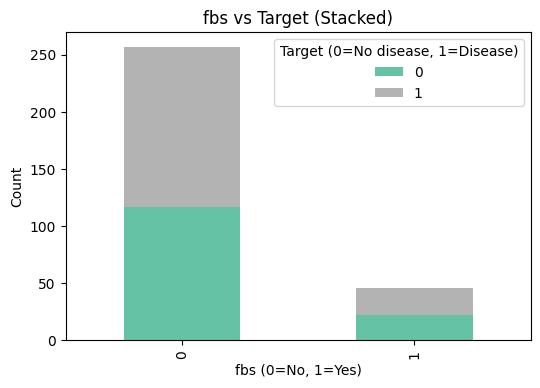

In [ ]:
ct = pd.crosstab(df['fbs'], df['target'])

# Plot stacked bar
ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap="Set2")
plt.title("fbs vs Target (Stacked)")
plt.xlabel("fbs (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Target (0=No disease, 1=Disease)")
plt.show()


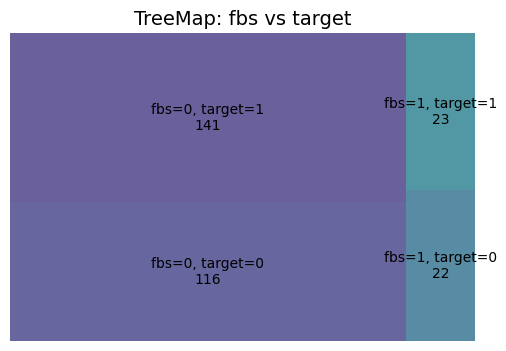

In [ ]:
# Example: group data by fbs and target
grouped = df.groupby(['fbs', 'target']).size().reset_index(name='count')

# Prepare labels and sizes for treemap
labels = [f"fbs={row['fbs']}, target={row['target']}\n{row['count']}" for _, row in grouped.iterrows()]
sizes = grouped['count'].values

# Plot TreeMap
plt.figure(figsize=(6, 4))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title("TreeMap: fbs vs target", fontsize=14)
plt.axis('off')
plt.show()

## **Target vs Exang – Conclusions**
- **Distribution:**
  - **Exang=0 & Target=1** has the highest count (≈69.45%) → majority of people without exercise-induced angina are in the heart disease group.
  - **Exang=0 & Target=0** comes next (≈30.54%).
  - **Exang=1** group has a much lower proportion with heart disease (≈23.23%) compared to those without (≈76.76%).

- **Key Observation:**
  - **Absence of exercise-induced angina (exang=0)** correlates with **higher heart disease prevalence** in this dataset.
  - **Presence of exang=1** shows a lower chance of heart disease — which may look counterintuitive clinically, but could be due to dataset bias or distribution.


In [ ]:
pd.crosstab(df['target'],df['exang'],normalize='columns')*100

exang           0          1
target                      
0       30.541872  76.767677
1       69.458128  23.232323

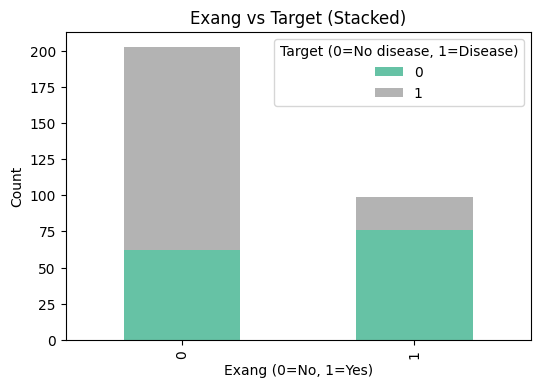

In [ ]:
ct = pd.crosstab(df['exang'], df['target'])

# Plot stacked bar
ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap="Set2")
plt.title("Exang vs Target (Stacked)")
plt.xlabel("Exang (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Target (0=No disease, 1=Disease)")
plt.show()


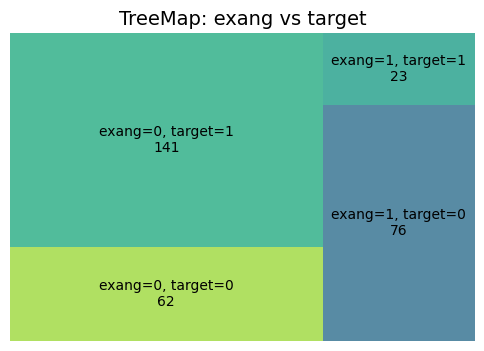

In [ ]:
grouped = df.groupby(['exang', 'target']).size().reset_index(name='count')

labels = [f"exang={row['exang']}, target={row['target']}\n{row['count']}" for _, row in grouped.iterrows()]
sizes = grouped['count'].values

plt.figure(figsize=(6, 4))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title("TreeMap: exang vs target", fontsize=14)
plt.axis('off')
plt.show()

📊 Analysis for cp vs target
--------------------------------------------------
target          0          1
cp                          
0       72.727273  27.272727
1       18.000000  82.000000
2       20.930233  79.069767
3       30.434783  69.565217




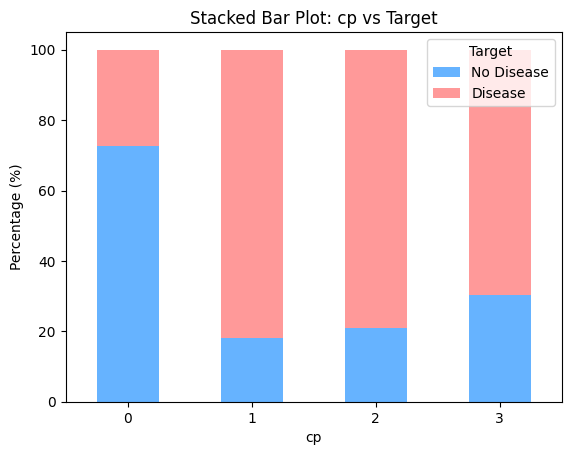

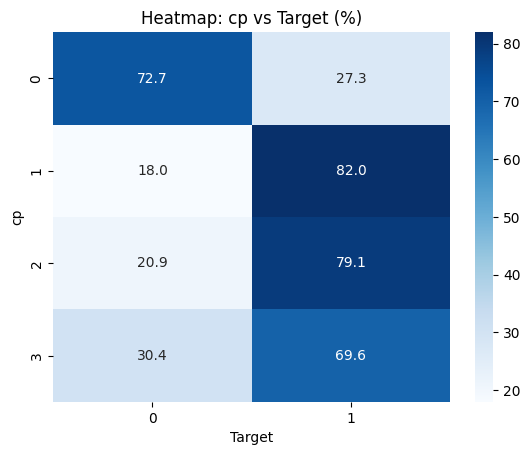

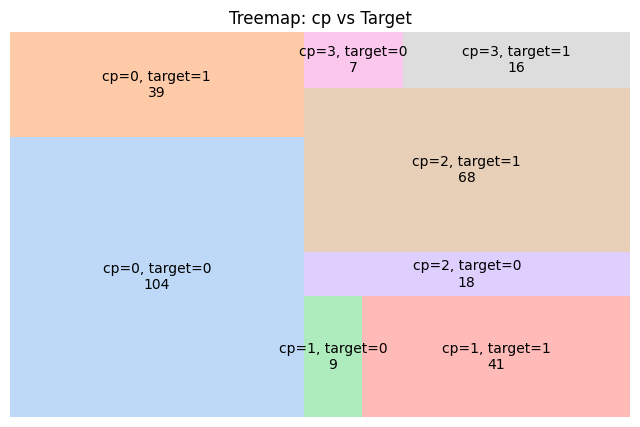

📊 Analysis for restecg vs target
--------------------------------------------------
target           0          1
restecg                      
0        53.741497  46.258503
1        37.086093  62.913907
2        75.000000  25.000000




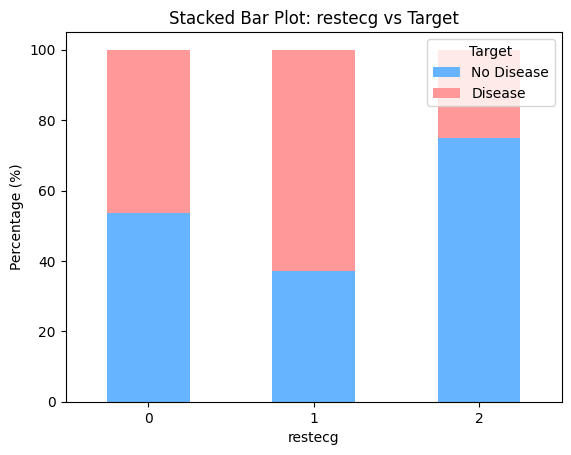

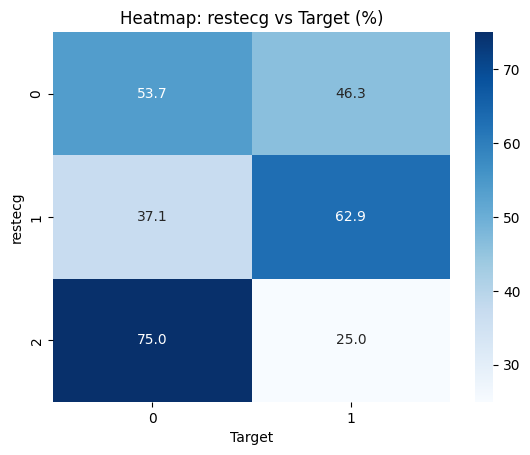

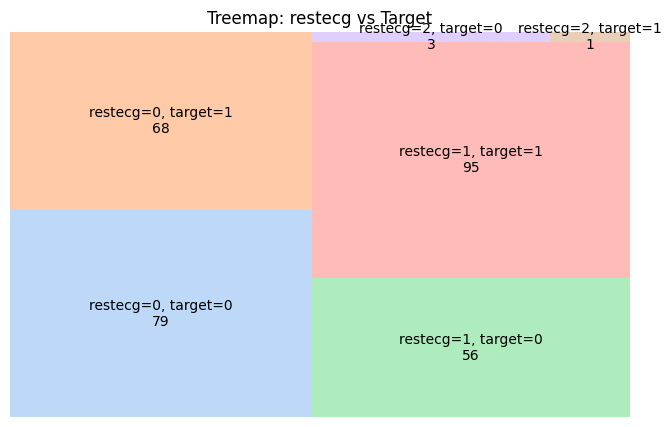

📊 Analysis for slope vs target
--------------------------------------------------
target          0          1
slope                       
0       57.142857  42.857143
1       65.000000  35.000000
2       24.822695  75.177305




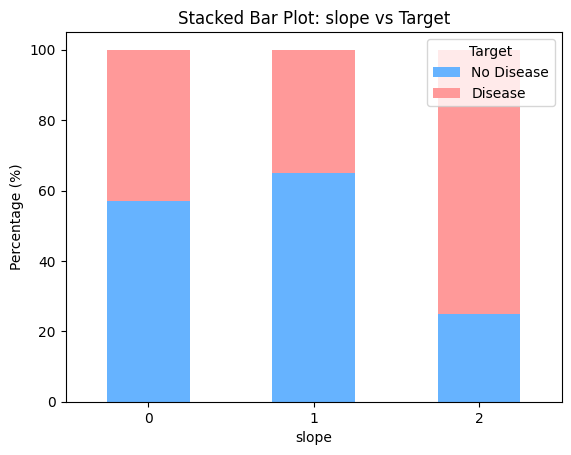

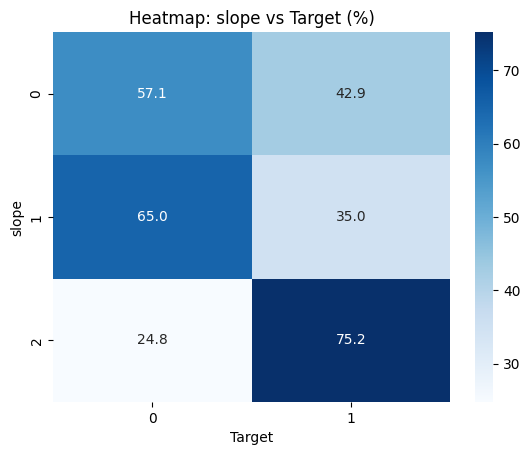

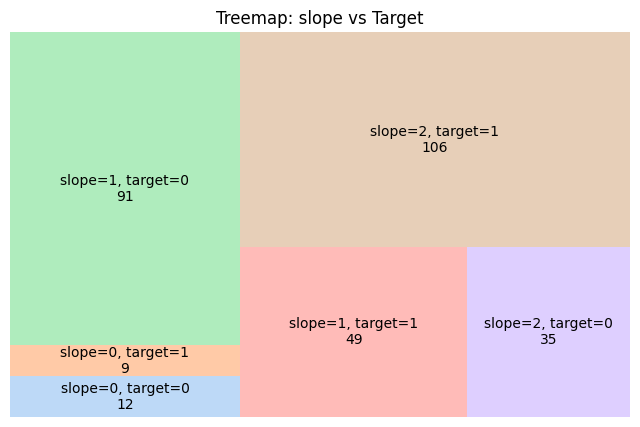

📊 Analysis for ca vs target
--------------------------------------------------
target          0          1
ca                          
0       25.714286  74.285714
1       67.692308  32.307692
2       81.578947  18.421053
3       85.000000  15.000000
4       25.000000  75.000000




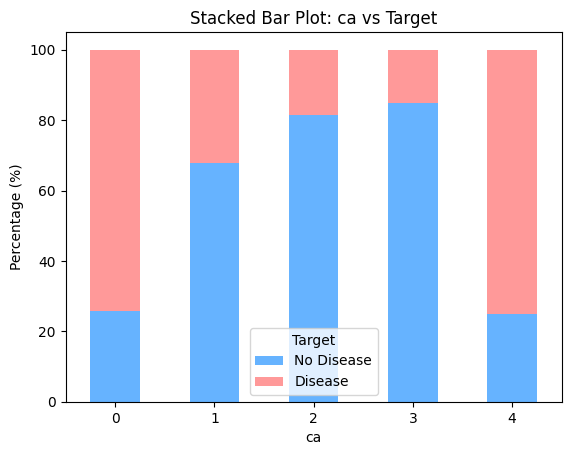

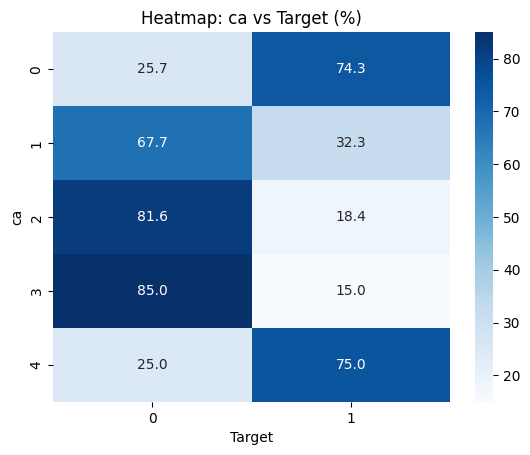

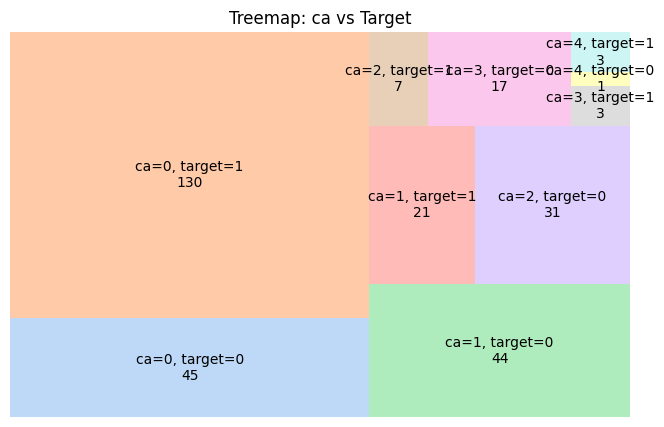

📊 Analysis for thal vs target
--------------------------------------------------
target          0          1
thal                        
0       50.000000  50.000000
1       66.666667  33.333333
2       21.818182  78.181818
3       76.068376  23.931624




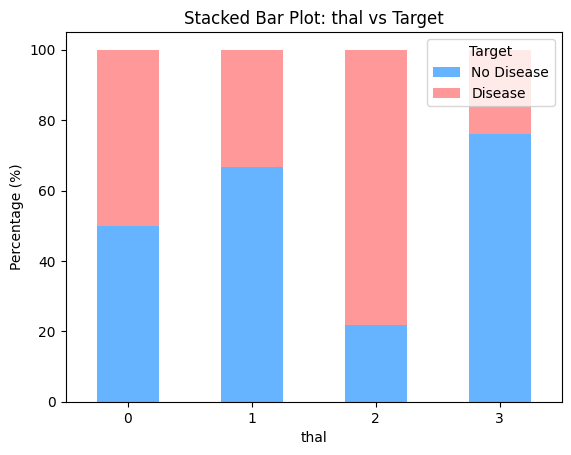

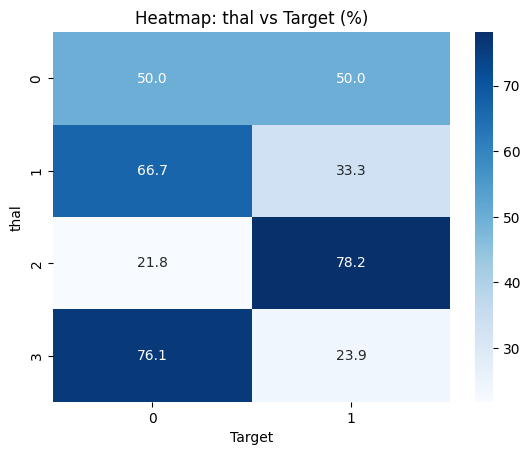

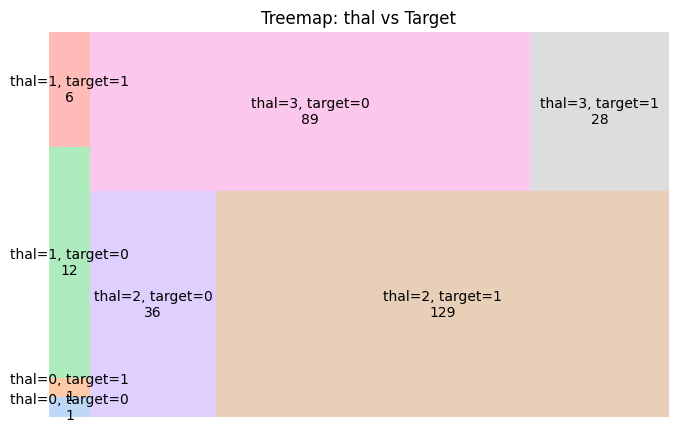

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # for tree maps

categorical_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

for col in categorical_cols:
    print(f"📊 Analysis for {col} vs target")
    print("-"*50)

    # 1️⃣ Crosstab (contingency table)
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    print(ct)
    print("\n")

    # 2️⃣ Stacked Bar Plot
    ct.plot(kind='bar', stacked=True, color=['#66b3ff','#ff9999'])
    plt.title(f"Stacked Bar Plot: {col} vs Target")
    plt.ylabel("Percentage (%)")
    plt.xlabel(col)
    plt.legend(title='Target', labels=['No Disease','Disease'])
    plt.xticks(rotation=0)
    plt.show()

    print()

    # 3️⃣ Heatmap of Crosstab
    sns.heatmap(ct, annot=True, cmap='Blues', fmt=".1f")
    plt.title(f"Heatmap: {col} vs Target (%)")
    plt.ylabel(col)
    plt.xlabel("Target")
    plt.show()

    print()

    # 4️⃣ Tree Map (only if unique values < 10 for readability)
    if df[col].nunique() < 10:
        sizes = df.groupby([col, 'target']).size().reset_index(name='count')
        labels = [f"{col}={row[col]}, target={row['target']}\n{row['count']}" for idx, row in sizes.iterrows()]
        colors = sns.color_palette("pastel", len(labels))
        plt.figure(figsize=(8, 5))
        squarify.plot(sizes=sizes['count'], label=labels, color=colors, alpha=0.7)
        plt.title(f"Treemap: {col} vs Target")
        plt.axis('off')
        plt.show()


## CP vs Target
#### **Conclusions:**
- **cp=1** has the highest % of people with heart disease (**82%**).
- **cp=2** also shows a very high % (**79%**) in the heart disease group.
- **cp=3** has slightly lower but still significant heart disease cases (**69.56%**).
- **cp=0** is the only one where majority are without heart disease (**72.7%**).

**Insight:**  
Chest pain type (cp) looks like a **strong predictor** for heart disease — especially cp=1 and cp=2, where >75% of patients have heart disease.  
This feature should get **higher weight** in a predictive model, as it clearly separates risk groups.


## Restecg vs Target
#### **Conclusions:**
- **restecg=1** has the highest % of heart disease cases (**62.9%**).
- **restecg=0** is almost balanced (≈54% no heart disease, ≈46% with heart disease).
- **restecg=2** shows the lowest heart disease cases (**25%**), meaning most people here are without heart disease.

**Insight:**  
Resting ECG result seems to have a **moderate predictive power** — restecg=1 (ST–T abnormality) is more common among patients with heart disease.  
restecg=2 (LVH) could potentially indicate **lower risk** in this dataset, but this might not generalize medically.  
This feature might work better when combined with others (like cp or thalach) rather than alone.

## Slope vs Target
#### **Conclusions:**
- **slope=2** (upsloping) has the highest % of people with heart disease (**75.2%**).
- **slope=0** (downsloping) and **slope=1** (flat) have majority of people without heart disease (**57%** and **65%** respectively).
- Tree map confirms that the most common combo is **slope=2 & target=1**, which is the strongest indicator of heart disease in this feature.

**Insight:**  
Slope seems to be a **strong risk indicator** — upsloping (slope=2) is highly associated with heart disease in this dataset.  
This feature can be a **key input for a predictive model**, especially when combined with cp and thalach for better separation of risk groups.


## CA vs Target
#### **Conclusions:**
- **ca=0** has the highest % of people with heart disease (**74.3%**).  
- **ca=1, ca=2, ca=3** have a much higher proportion of people without heart disease (**67.7%, 81.6%, 85%** respectively).  
- **ca=4** appears only 4 times, so it’s too rare to draw any strong conclusion — could represent a special case.

Tree map and heatmap confirm that the most frequent combination is **ca=0 & target=1** (heart disease).

**Insight:**  
Number of major vessels (ca) is a **very strong feature** — having **0 vessels colored (ca=0)** is highly associated with heart disease.  
This makes ca one of the **most powerful predictors** in this dataset and should be given high importance in any model.


## Thal vs Target
#### **Conclusions:**
- **thal=2** has the highest % of people with heart disease (**78.2%**) → strongest risk group.  
- **thal=0** is evenly split (50% heart disease, 50% no heart disease).  
- **thal=1** and **thal=3** have more people without heart disease (**66.7%** and **76.1%** respectively).

Tree map confirms that the most common combination is **thal=2 & target=1**, making it the dominant risk pattern in this feature.

**Insight:**  
Thal is a **very important feature** — especially **thal=2**, which is highly correlated with heart disease in this dataset.  

# Bivariate Analysis (Numerical vs Categorical)

## Age vs Target  
#### **Conclusions:**  
- **Age Distribution:**  
  - Individuals with heart disease (target=1) tend to be slightly **younger on average** than those without heart disease (target=0).  
  - Mean age of target=1 group is **lower** compared to target=0.  

- **Visual Insights:**  
  - **Violin plot** shows a wider spread of ages in the heart disease group, suggesting greater variability.  
  - **KDE plot** highlights that the 50–60 and 60–70 age groups have more individuals **without heart disease**, whereas other age groups have a higher proportion with heart disease.  

- **Interpretation:**  
  - Heart disease is relatively **more common in younger age groups (<50)** in this dataset.




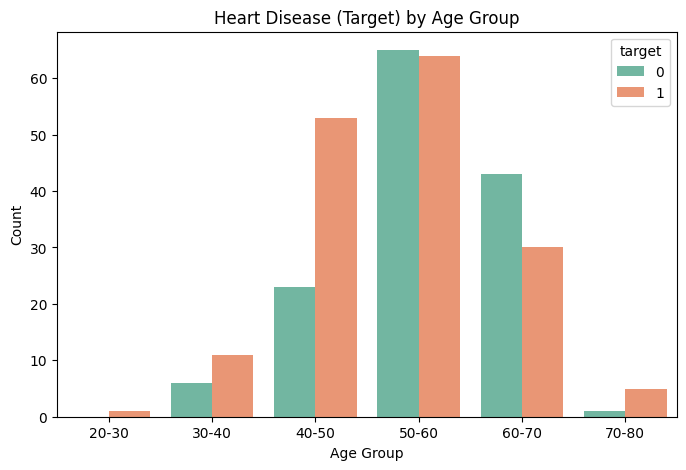

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80], labels=['20-30','30-40','40-50','50-60','60-70','70-80'])

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='target', palette='Set2')
plt.title("Heart Disease (Target) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1409466631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='age', palette='Set2')


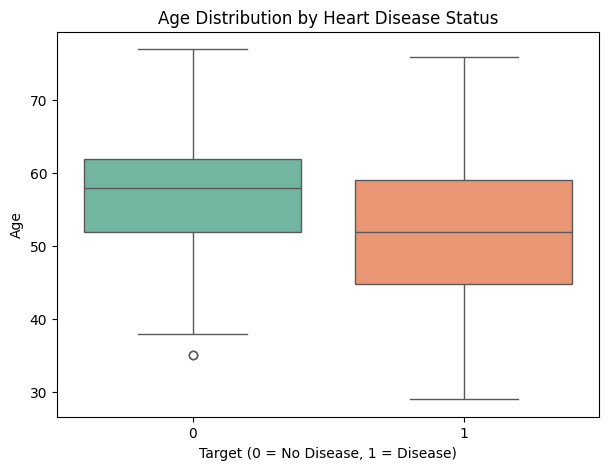

In [ ]:

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='target', y='age', palette='Set2')
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Age")
plt.show()

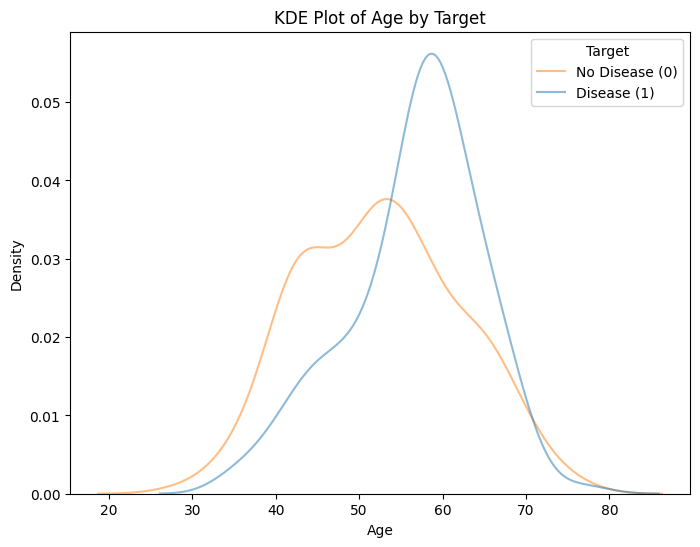

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="age", hue="target", common_norm=False, alpha=0.5)

plt.title("KDE Plot of Age by Target")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Target", labels=["No Disease (0)", "Disease (1)"])
plt.show()

/tmp/ipython-input-4126063751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="target", y="age", palette="Set2", inner="box")


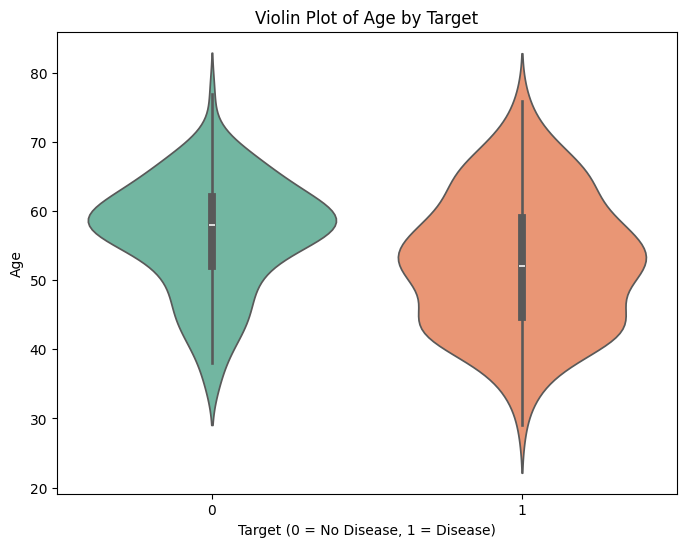

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="target", y="age", palette="Set2", inner="box")

plt.title("Violin Plot of Age by Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Age")
plt.show()



📊 Bivariate Analysis: target vs trestbps



/tmp/ipython-input-989466118.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y=col, ax=axes[0,1], palette="Set2")
/tmp/ipython-input-989466118.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

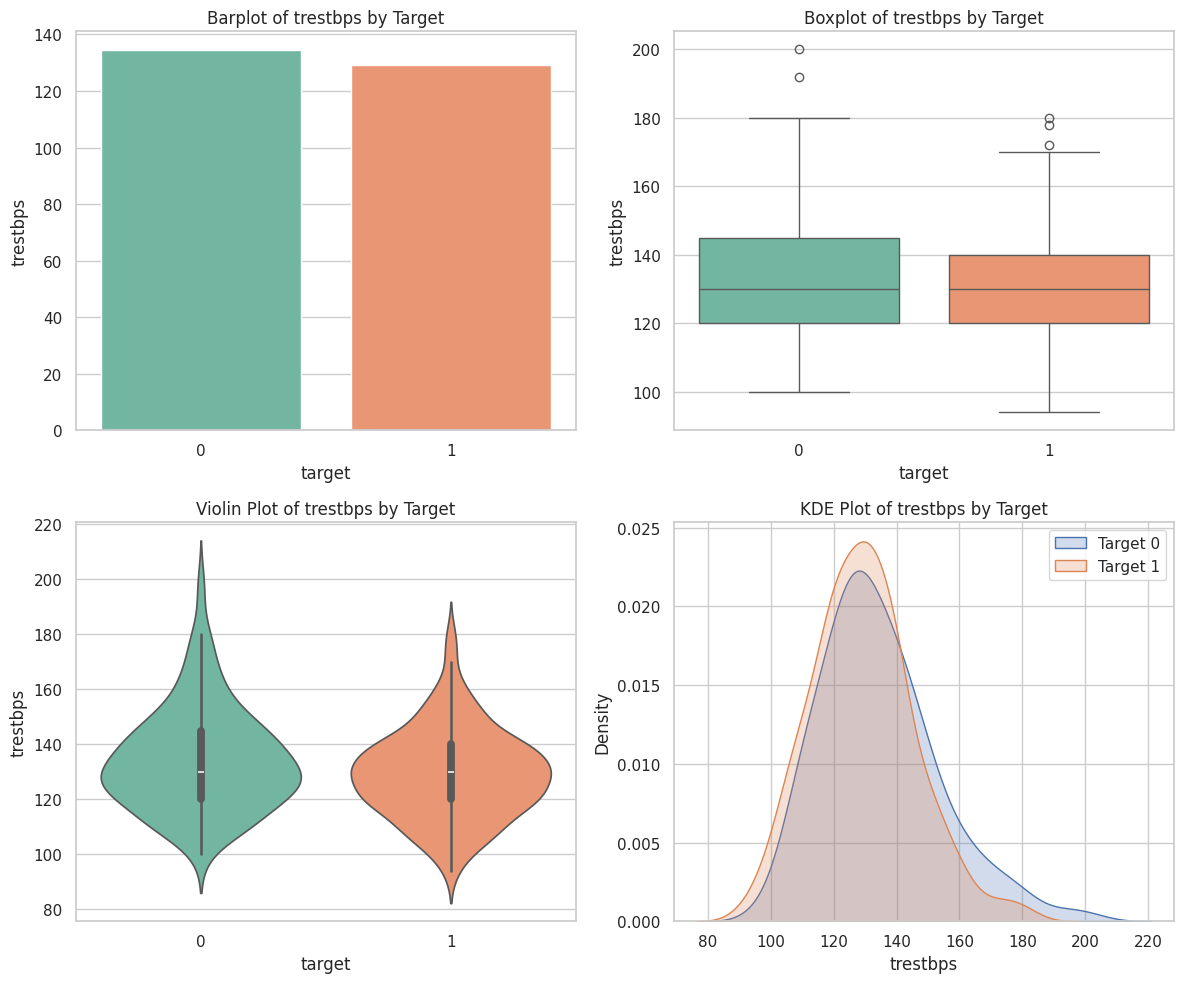


📊 Bivariate Analysis: target vs chol



/tmp/ipython-input-989466118.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y=col, ax=axes[0,1], palette="Set2")
/tmp/ipython-input-989466118.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

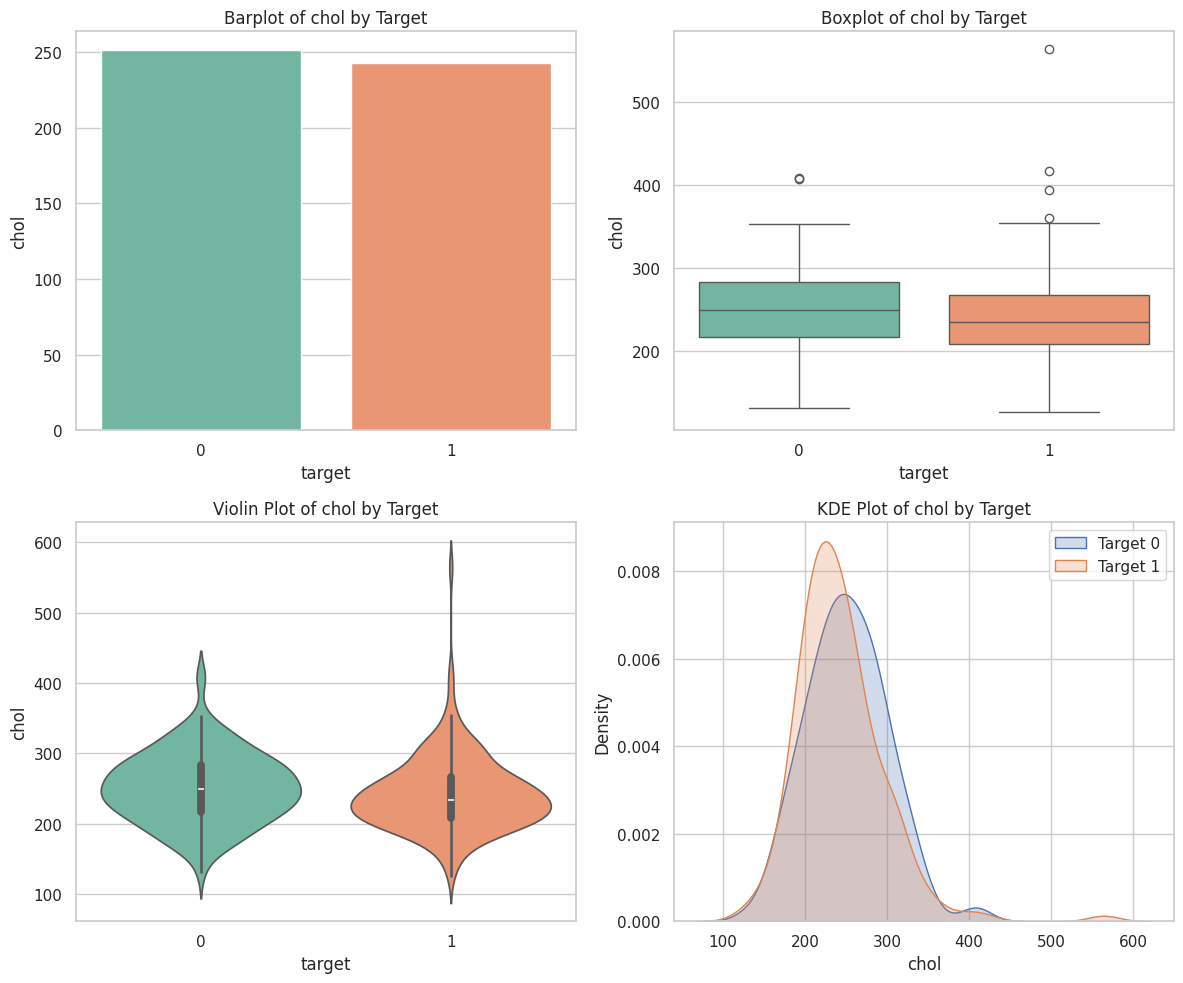


📊 Bivariate Analysis: target vs thalach



/tmp/ipython-input-989466118.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y=col, ax=axes[0,1], palette="Set2")
/tmp/ipython-input-989466118.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

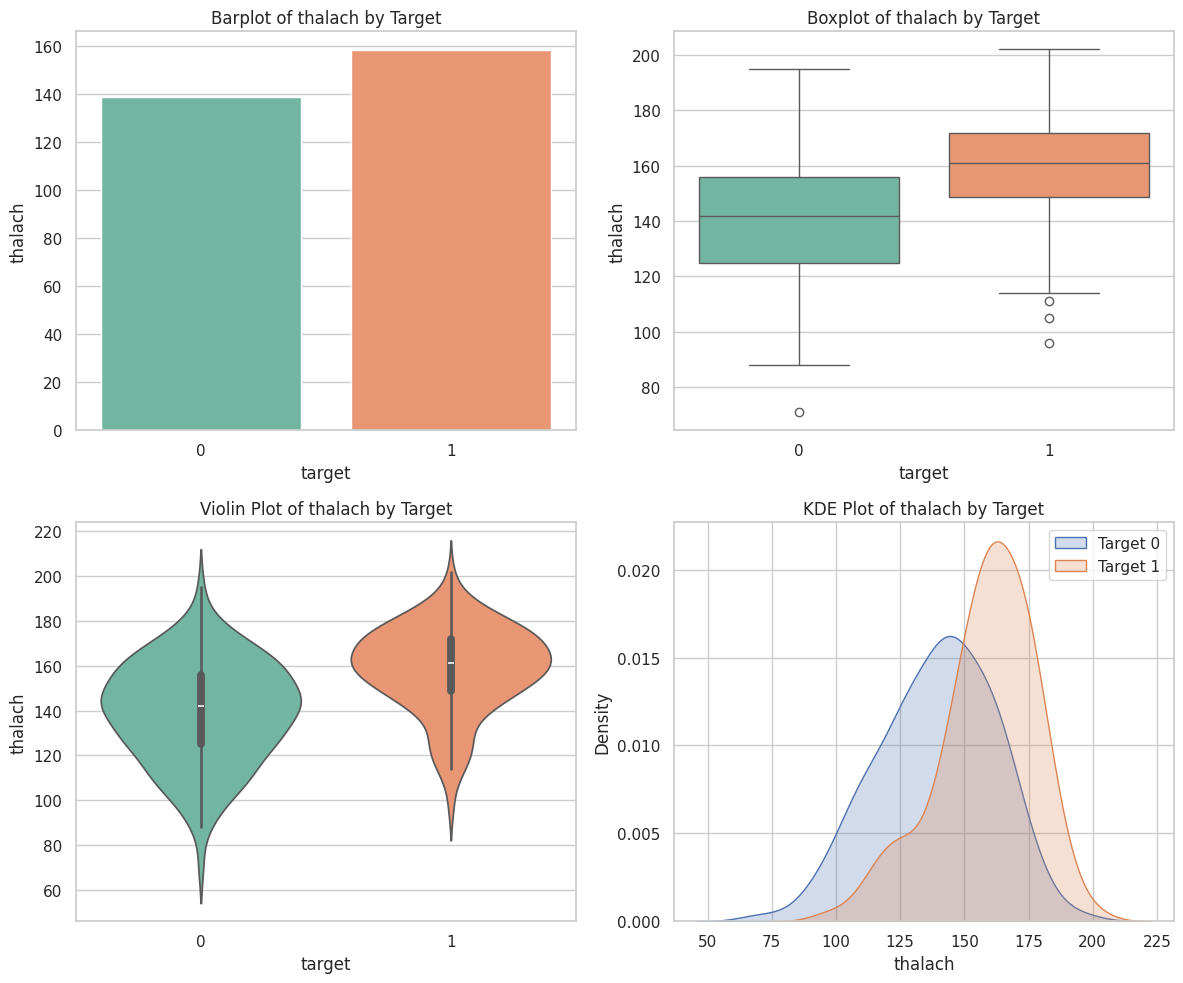


📊 Bivariate Analysis: target vs oldpeak



/tmp/ipython-input-989466118.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
/tmp/ipython-input-989466118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="target", y=col, ax=axes[0,1], palette="Set2")
/tmp/ipython-input-989466118.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

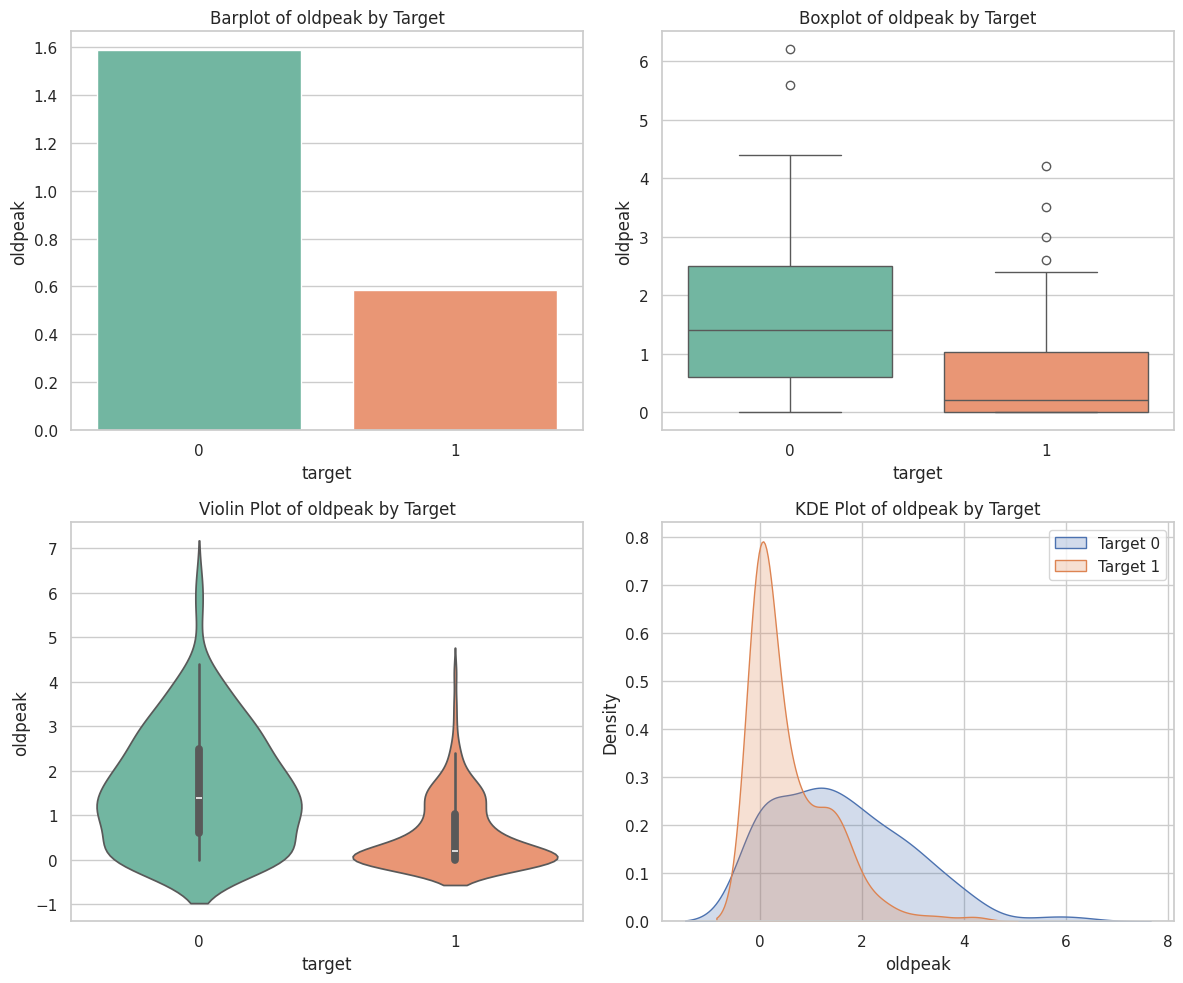

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

cols = ["trestbps", "chol", "thalach", "oldpeak"]

for col in cols:
    print(f"\n📊 Bivariate Analysis: target vs {col}\n")

    fig, axes = plt.subplots(2, 2, figsize=(12,10))

    # 1. Barplot (mean comparison)
    sns.barplot(data=df, x="target", y=col, ax=axes[0,0], palette="Set2", ci=None)
    axes[0,0].set_title(f"Barplot of {col} by Target")

    # 2. Boxplot
    sns.boxplot(data=df, x="target", y=col, ax=axes[0,1], palette="Set2")
    axes[0,1].set_title(f"Boxplot of {col} by Target")

    # 3. Violin Plot
    sns.violinplot(data=df, x="target", y=col, ax=axes[1,0], palette="Set2", inner="box")
    axes[1,0].set_title(f"Violin Plot of {col} by Target")

    # 4. KDE Plot (distribution overlay)
    for t in df["target"].unique():
        sns.kdeplot(df[df["target"]==t][col], ax=axes[1,1], label=f"Target {t}", shade=True)
    axes[1,1].set_title(f"KDE Plot of {col} by Target")
    axes[1,1].legend()

    plt.tight_layout()
    plt.show()


## Trestbps vs Target
#### **Conclusions:**
- Average **trestbps** is almost the same for both groups (target=0 and target=1).
- Boxplot shows presence of **outliers** in both groups.
- There is significant overlap between trestbps values for people with and without heart disease.

**Insight:**  
Trestbps alone does **not seem to be a strong differentiator** for heart disease in this dataset.  
It might still be useful when combined with other numerical features (like age or thalach), but on its own it has limited predictive power.


## Chol vs Target
#### **Conclusions:**
- Average and median **cholesterol levels** are slightly higher for people **without heart disease** (target=0).  
- Boxplot shows **outliers at higher cholesterol values**, and the heart disease group has more extreme values.  
- KDE plot shows that heart disease patients have **higher density** in the range **180–250**.  
- There is still a significant overlap between the two groups, so chol alone cannot fully separate them.

**Insight:**  
Cholesterol may have **some predictive value**, especially in the 180–250 range where density for heart disease patients is higher.  
However, it is not a strong standalone predictor and should be combined with other features (like cp, ca, and thalach) for better risk stratification.


## Thalach vs Target
#### **Conclusions:**
- Individuals with **heart disease (target=1)** tend to have a **higher thalach** (maximum heart rate achieved) compared to those without heart disease.
- Mean thalach is clearly higher for target=1.
- **Boxplot** shows that people without heart disease have a wider spread of thalach values, while the heart disease group is more concentrated towards higher values.
- **KDE plot** indicates that if thalach is in the range **150–215**, there is a higher probability of heart disease.
- A few outliers are present in both groups.

**Insight:**  
Thalach appears to be a **very strong predictor** — higher thalach is strongly associated with heart disease in this dataset.  
This feature should play an **important role in the model**, potentially combined with cp, ca, and thal to capture overall risk more accurately.


## Oldpeak vs Target
#### **Conclusions:**
- People with **heart disease (target=1)** have **lower average oldpeak** values compared to those without heart disease.
- **Boxplot** shows that target=0 group has a wider spread and higher median oldpeak, while target=1 group is more concentrated at lower values.
- **Violin plot** confirms that the distribution for target=1 is shifted towards lower values.
- **KDE plot** shows a clear separation: target=1 peaks at lower oldpeak values, while target=0 distribution is shifted right and shows more outliers.

**Insight:**  
Oldpeak is a **useful risk indicator** — lower oldpeak values are more associated with heart disease in this dataset.  
This feature could work well as a **negative predictor** (lower = higher risk) in a model and should be considered together with slope and exang to capture ST depression-related patterns.


# Bivariate Analysis (Numerical vs Numerical vs Categorical)


🔍 Numerical vs Numerical Analysis: age vs trestbps


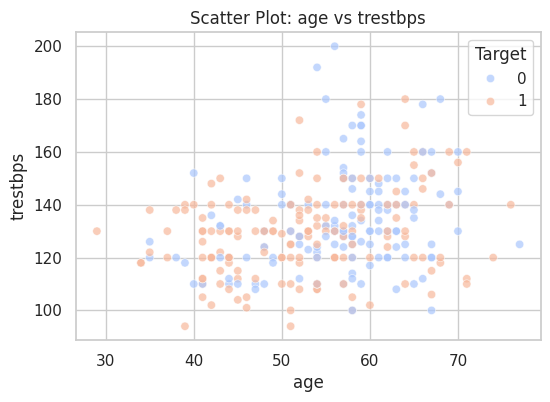

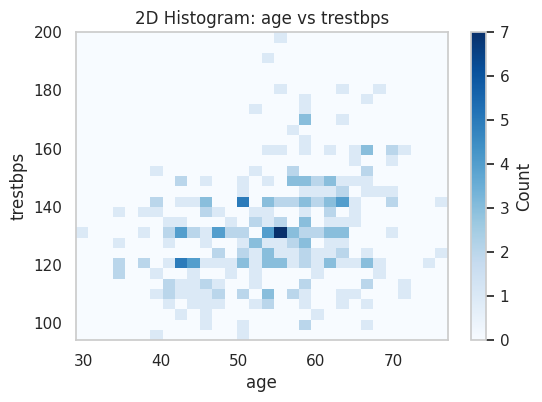

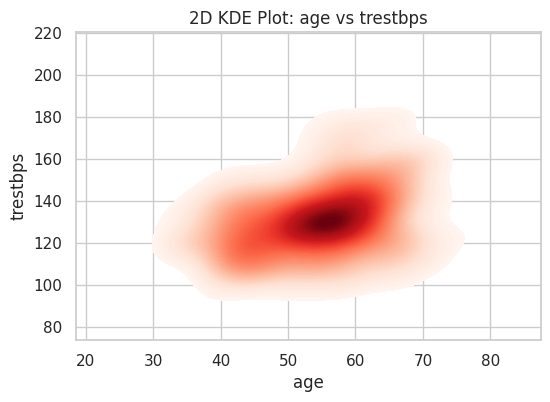


 Pearson Correlation between age & trestbps: 0.283

🔍 Numerical vs Numerical Analysis: age vs chol


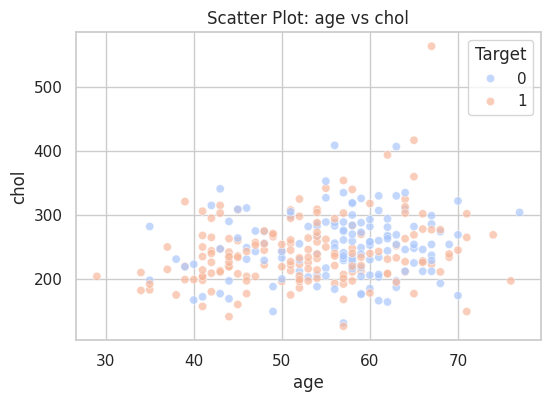

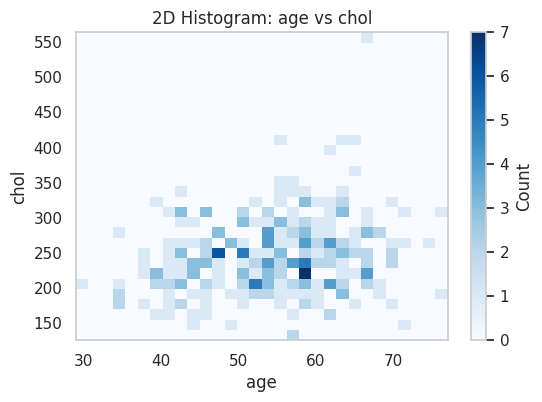

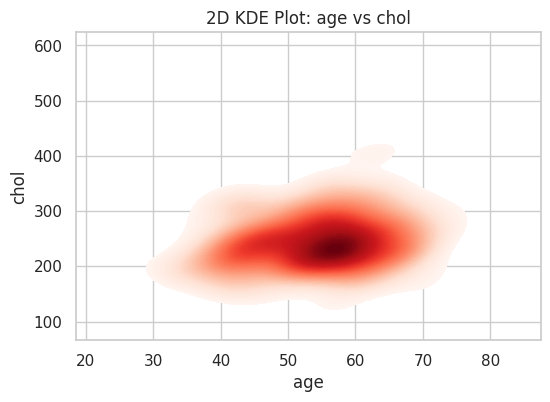


 Pearson Correlation between age & chol: 0.207

🔍 Numerical vs Numerical Analysis: age vs thalach


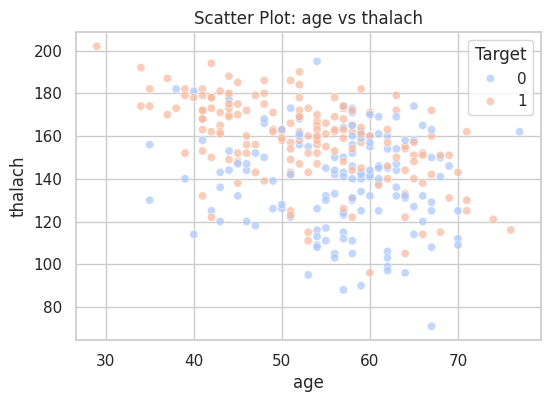

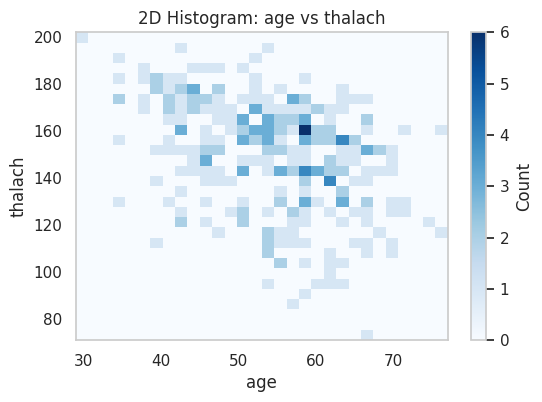

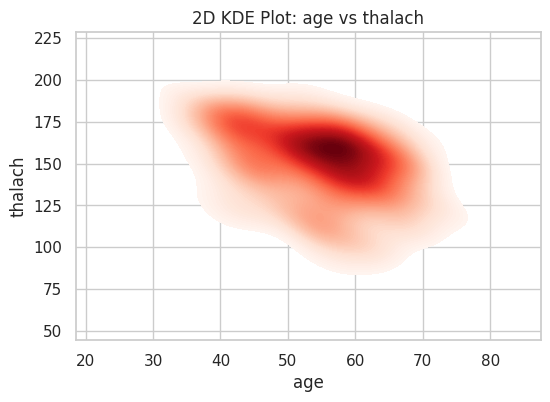


 Pearson Correlation between age & thalach: -0.395

🔍 Numerical vs Numerical Analysis: age vs oldpeak


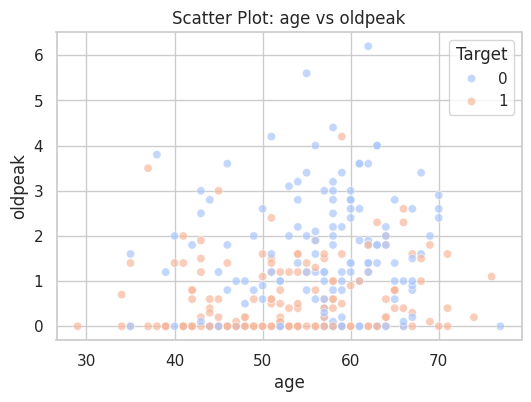

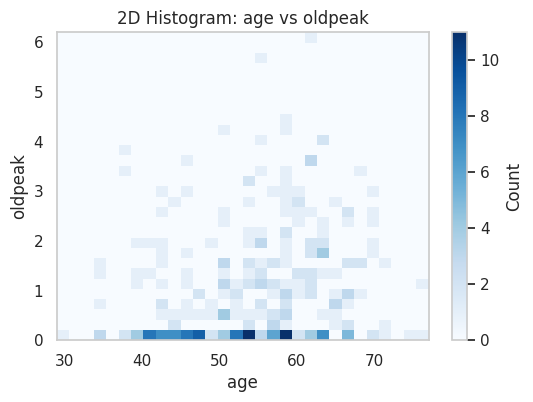

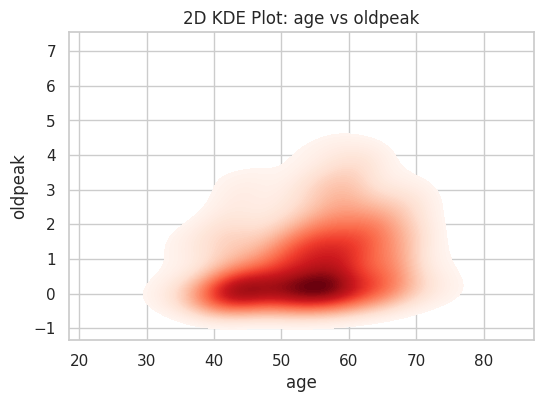


 Pearson Correlation between age & oldpeak: 0.206

🔍 Numerical vs Numerical Analysis: trestbps vs chol


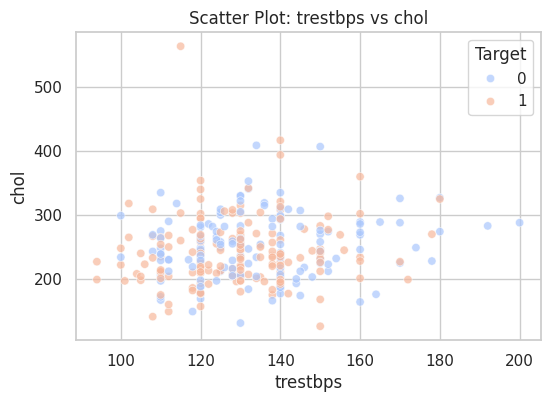

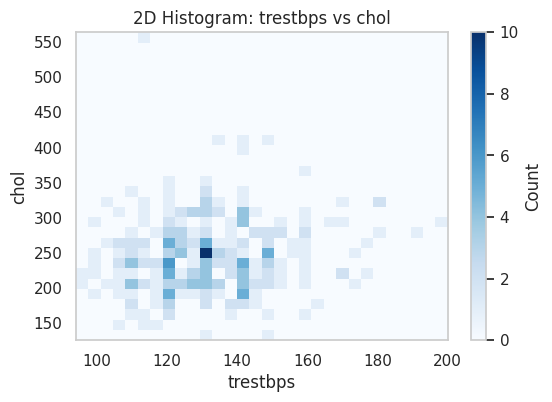

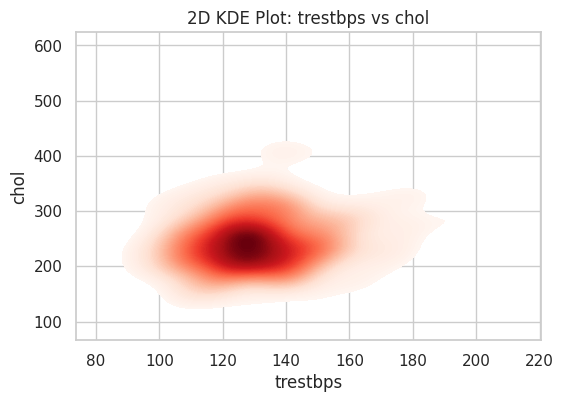


 Pearson Correlation between trestbps & chol: 0.125

🔍 Numerical vs Numerical Analysis: trestbps vs thalach


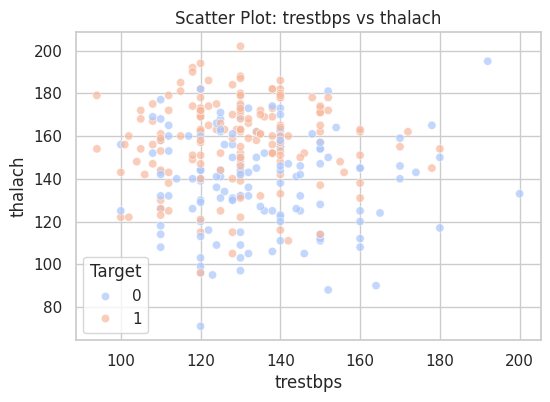

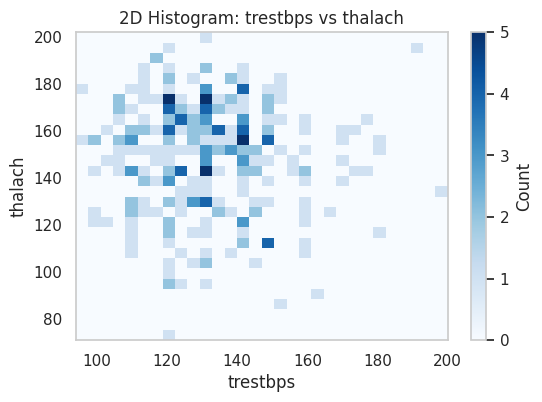

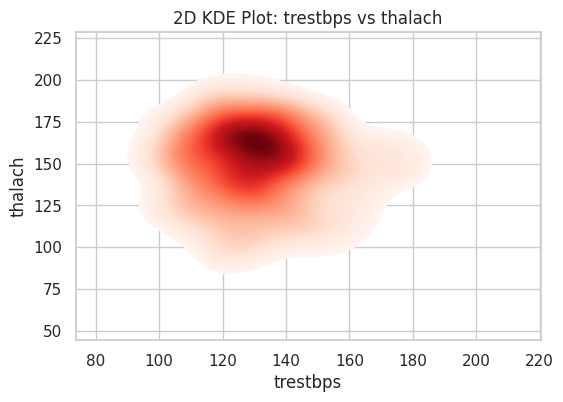


 Pearson Correlation between trestbps & thalach: -0.048

🔍 Numerical vs Numerical Analysis: trestbps vs oldpeak


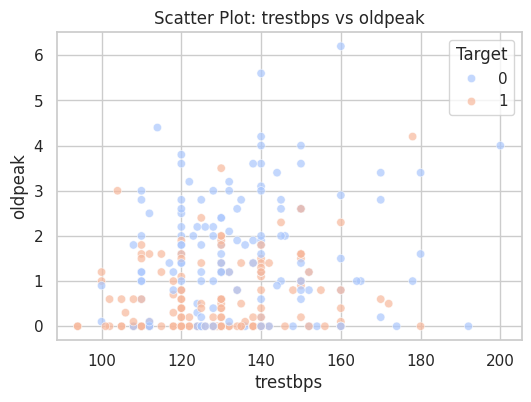

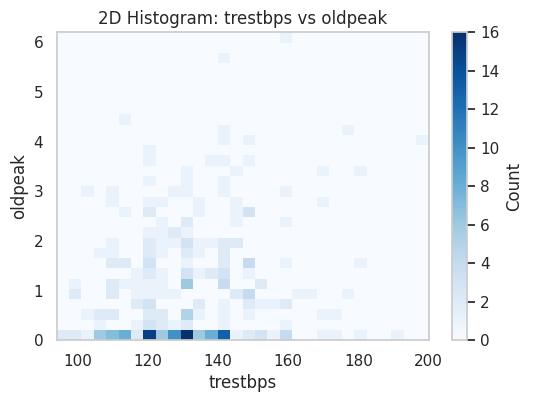

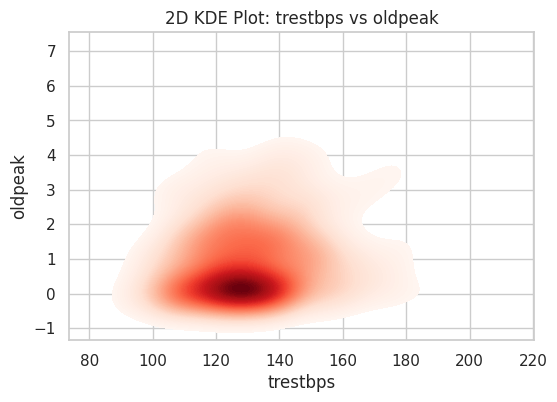


 Pearson Correlation between trestbps & oldpeak: 0.195

🔍 Numerical vs Numerical Analysis: chol vs thalach


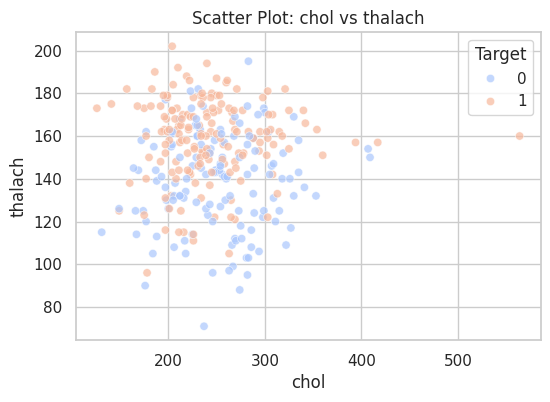

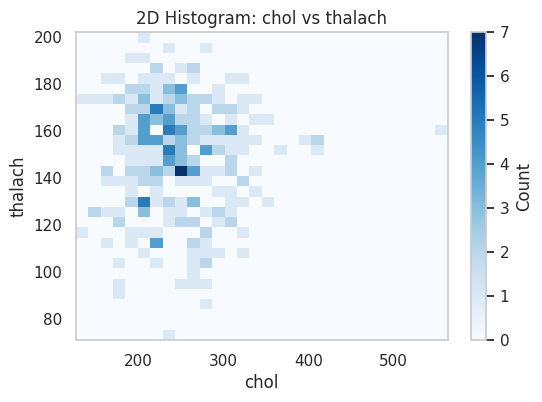

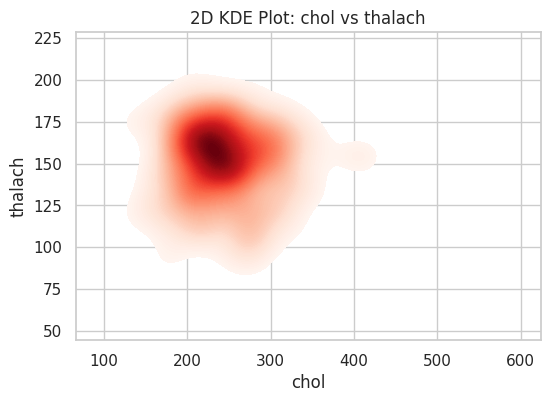


 Pearson Correlation between chol & thalach: -0.005

🔍 Numerical vs Numerical Analysis: chol vs oldpeak


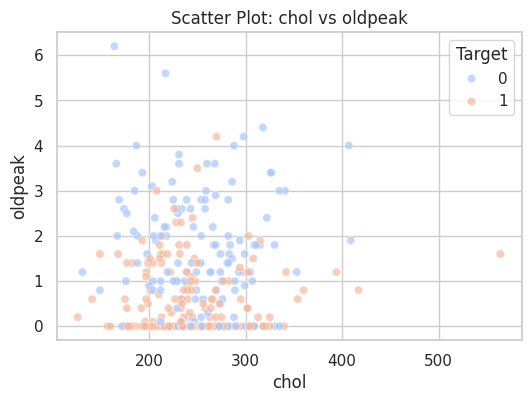

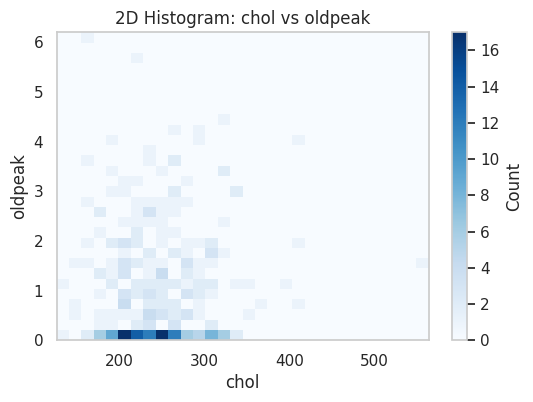

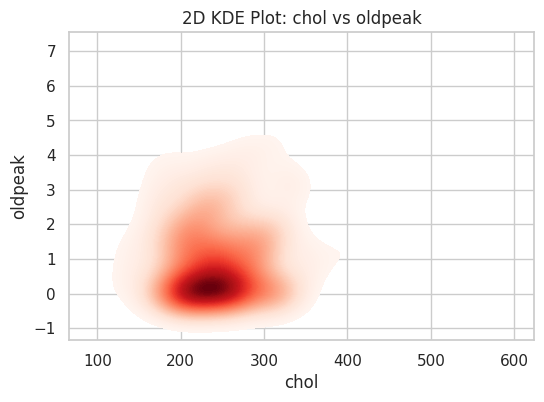


 Pearson Correlation between chol & oldpeak: 0.050

🔍 Numerical vs Numerical Analysis: thalach vs oldpeak


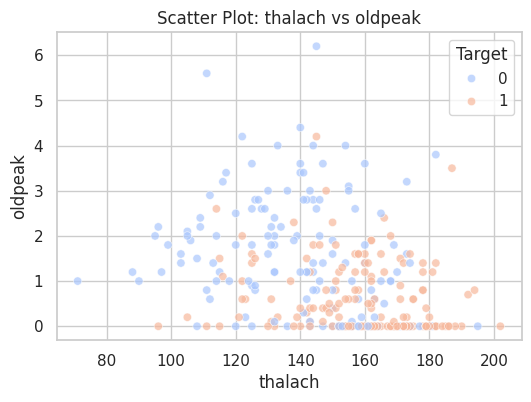

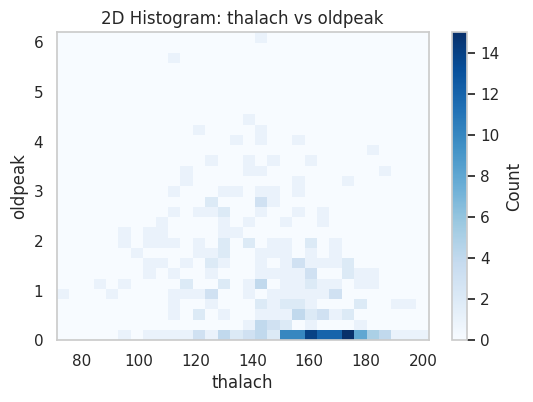

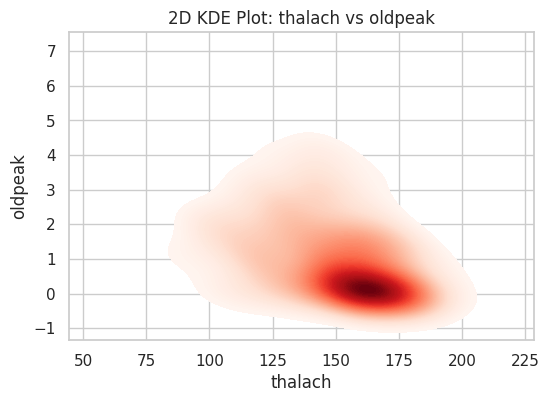


 Pearson Correlation between thalach & oldpeak: -0.342


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# We'll compare every pair of numerical features
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        x = numerical_cols[i]
        y = numerical_cols[j]
        print(f"\n🔍 Numerical vs Numerical Analysis: {x} vs {y}")

        # Scatter Plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[x], y=df[y], hue=df['target'], palette='coolwarm', alpha=0.7)
        plt.title(f"Scatter Plot: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend(title='Target')
        plt.show()
        print()

        # 2D Histogram
        plt.figure(figsize=(6, 4))
        plt.hist2d(df[x], df[y], bins=30, cmap='Blues')
        plt.colorbar(label='Count')
        plt.title(f"2D Histogram: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
        print()

        # 2D KDE Plot
        plt.figure(figsize=(6, 4))
        sns.kdeplot(x=df[x], y=df[y], fill=True, cmap='Reds', thresh=0.05, levels=100)
        plt.title(f"2D KDE Plot: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
        print()

        # Correlation Coefficient
        corr = df[[x, y]].corr().iloc[0, 1]
        print(f" Pearson Correlation between {x} & {y}: {corr:.3f}")


### Age vs Resting Blood Pressure (trestbps) – Insight

- **Scatter Plot:** Shows a weak positive trend — as age increases, resting blood pressure (trestbps) tends to rise slightly, but the pattern is not strong.  
- **2D Histogram & KDE Plot:** Most data points lie in the mid-range of both age and blood pressure, indicating extreme values are relatively rare.  
- **Pearson Correlation (0.283):** Confirms a weak positive linear relationship between age and trestbps.  
- **Target (Heart Disease):** No clear separation or clustering is visible, suggesting this pair alone is not a strong predictor of heart disease.  


### Age vs Cholesterol (chol) – Insight

- **Scatter Plot:** Shows a very weak positive trend — cholesterol levels (chol) slightly increase with age, but the relationship is not strong.  
- **2D Histogram & KDE Plot:** Most points are concentrated in the mid-range of age and cholesterol values, indicating that extreme cholesterol levels are less frequent across all age groups.  
- **Pearson Correlation (0.207):** Confirms a very weak positive linear relationship between age and cholesterol.  
- **Target (Heart Disease):** No clear clustering or separation is seen — age and cholesterol together do not distinctly separate heart disease and non-heart disease groups.  


> **Key Takeaway:** Age and cholesterol have a mild positive relationship but are not strong predictors on their own.


### Age vs Maximum Heart Rate (thalach) – Insight

- **Pearson Correlation (-0.395):** Indicates a moderate negative linear relationship between age and thalach.  
- **Scatter Plot:** Shows a downward trend — as age increases, thalach tends to decrease, though the relationship is not perfectly strong.  
- **2D Histogram & KDE Plot:**  
  - Younger individuals cluster at higher thalach values.  
  - Older individuals cluster at lower thalach values.  

- **Target (Heart Disease):** This negative correlation suggests that thalach could be an important feature for distinguishing heart disease risk, as lower thalach is often associated with older age and potentially higher risk.

### Age vs ST Depression (oldpeak) – Insight

- **Pearson Correlation (0.206):** Indicates a weak positive linear relationship between age and oldpeak.  
- **Scatter Plot:** Shows a slight upward trend — as age increases, oldpeak values tend to rise, but the relationship is not strong.  
- **2D Histogram & KDE Plot:**  
  - Most data points are concentrated at **lower oldpeak values** across all age groups.  
  - There are fewer individuals with very high oldpeak, regardless of age.  

> **Key Takeaway:** Although there is a slight tendency for older individuals to have higher oldpeak values, the effect is weak. Oldpeak may not be a strong predictor by itself.


### Resting Blood Pressure (trestbps) vs Cholesterol (chol) – Insight

- **Pearson Correlation (0.125):** Indicates a very weak positive relationship between trestbps and chol.  
- **Scatter Plot & 2D Histogram:**  
  - Show that most data points are clustered around **lower trestbps and lower chol values**, meaning most individuals have normal or near-normal readings.  
  - No strong linear pattern is observed between the two variables.  

> **Key Takeaway:** The weak correlation suggests that **resting blood pressure and cholesterol are largely independent** in this dataset.

### Resting Blood Pressure (trestbps) vs Maximum Heart Rate (thalach)

- **Pearson Correlation (-0.048):**  
  Shows a **very weak negative correlation**, meaning there is almost no linear relationship between trestbps and thalach.

- **Scatter Plot & 2D Histogram:**  
  - Most data points are concentrated at **higher thalach values** with **lower trestbps values**.
  - The highest density region shows **more individuals with heart disease (target=1)**, suggesting that people with heart disease tend to have **higher thalach** while still maintaining **typical trestbps levels**.
- we see can see clustering of people with target=1 at high thalach and low trestbps

### Resting Blood Pressure (trestbps) vs ST Depression (oldpeak)

- **Pearson Correlation (0.195):**  
  Shows a **weak positive correlation**, meaning as trestbps increases, oldpeak also slightly increases.

- **Scatter Plot & 2D Histogram:**  
  Reveal a mild upward trend but with **wide dispersion** — most points are still concentrated near **lower trestbps and lower oldpeak values**.

- **Insight:**  
  Although the trend is positive, it is not strong enough to use trestbps as a predictor for oldpeak. The variables share only a weak linear association.


## Chol vs Thalach  
#### **Conclusions:**  
- **Correlation:** Pearson correlation = **-0.005**, indicating almost no linear relationship between cholesterol (chol) and maximum heart rate achieved (thalach).  
- **Visual Insights:**  
  - The scatter plot and 2D histogram show no clear trend or pattern — data points are widely scattered.  
  - Most data points are concentrated around **cholesterol levels between 200–300** and **thalach values in the mid-range (140–180)**.  
- **Target Insight:** The highest density of individuals with heart disease (target=1) appears in the region of **mid-range thalach and moderate chol levels**.  


## Chol vs Oldpeak  
#### **Conclusions:**  
- **Correlation:** Pearson correlation = **0.050**, indicating a very weak positive relationship between cholesterol (chol) and ST depression induced by exercise (oldpeak).  
- **Visual Insights:**  
  - Scatter plot and 2D histogram show **no strong trend** — data points are spread out.  
  - Most individuals cluster around **low oldpeak values (close to 0)** across all cholesterol levels.  

- **Target Insight:** The concentration of heart disease cases (target=1) is higher around **oldpeak = 0–1**, regardless of cholesterol values.  


## Thalach vs Oldpeak  
#### **Conclusions:**  
- **Correlation:** Pearson correlation = **-0.342**, indicating a moderate negative relationship — as **maximum heart rate achieved (thalach)** increases, **oldpeak (ST depression)** tends to decrease.  
- **Visual Insights:**  
  - Scatter plot shows a clear downward trend — individuals with higher thalach values generally have lower oldpeak readings.  
  - 2D histogram and KDE plot show a **dense concentration of points** in the mid-range of thalach (≈140-170) and **low oldpeak values (0-1)**.
- we can see that as thalach increases as people with lower oldpeak value increases, maximum people here with target=1




## Pairwise Relationships Between Numerical Features (Colored by Target)

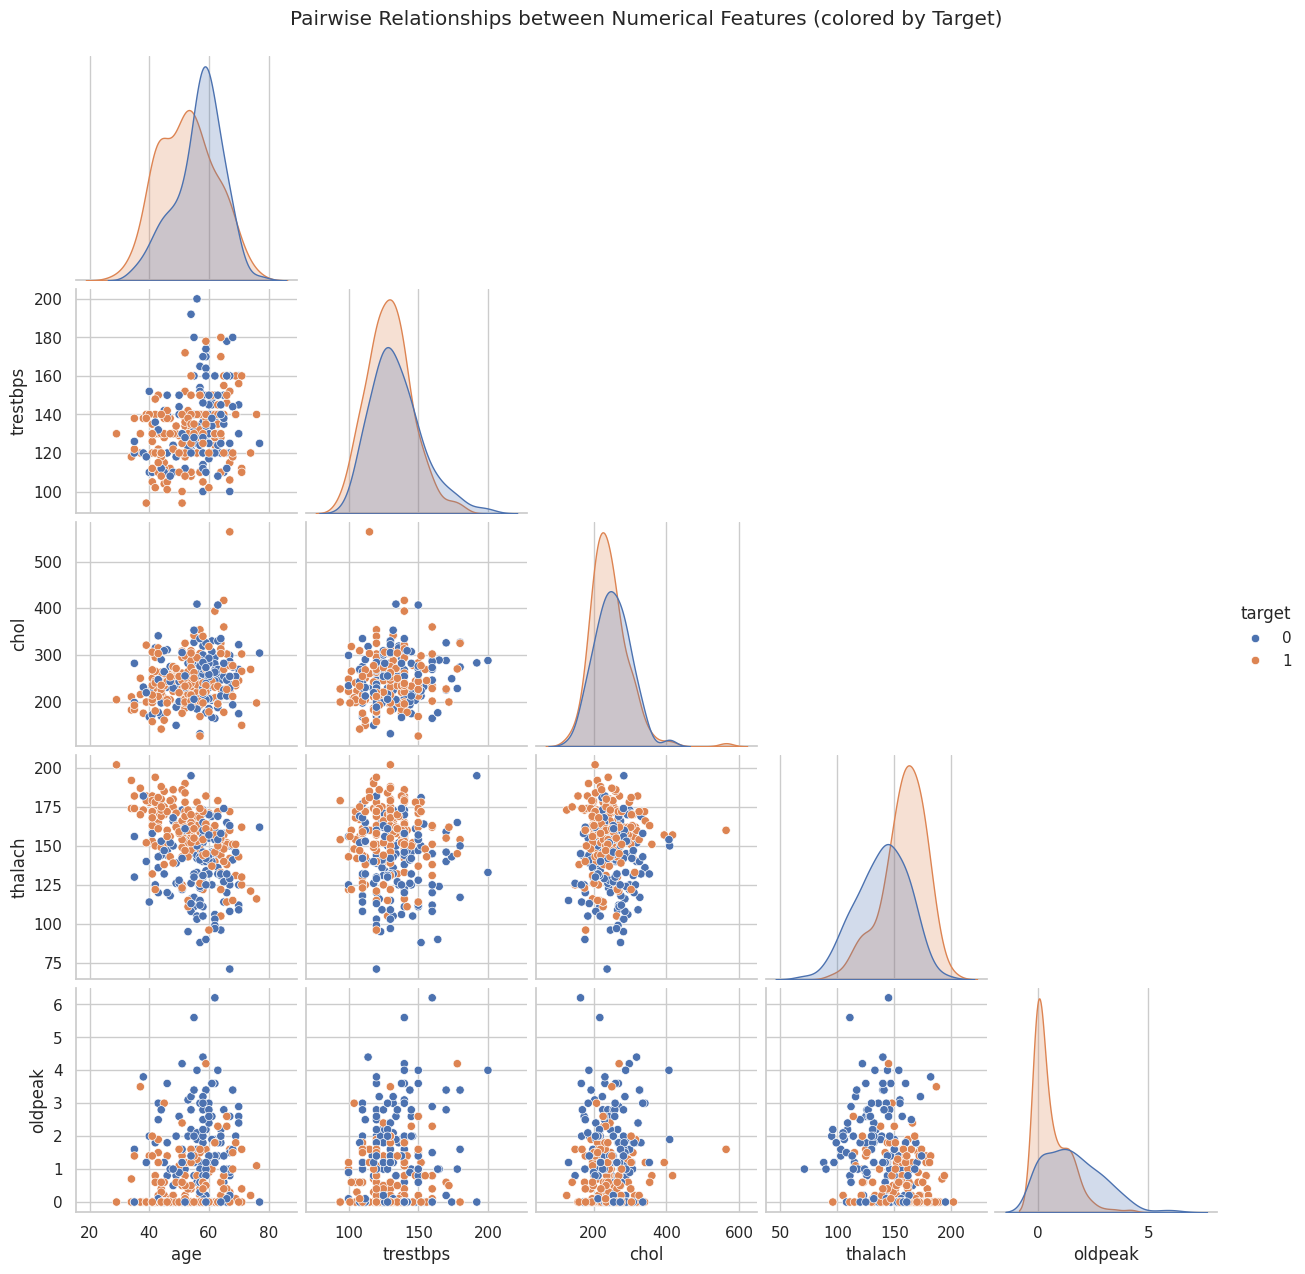

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns + target
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

sns.pairplot(df[num_cols], hue="target", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships between Numerical Features (colored by Target)", y=1.02)
plt.show()



Based on the pairplot visualization of numerical features, here are the key insights:

- **Age vs Thalach:**  
  - There is a clear **negative correlation** between age and maximum heart rate achieved (`thalach`).  
  - Individuals with heart disease (orange) generally have **higher thalach values for their age** compared to those without heart disease (blue).  

- **Thalach vs Oldpeak:**  
  - A **moderate negative correlation** exists between `thalach` and `oldpeak`.  
  - For the same thalach value, individuals with heart disease typically have **lower oldpeak values** than those without heart disease.  

- **Other Feature Pairs (e.g., Age vs Trestbps, Age vs Chol, Trestbps vs Chol):**  
  - These pairs show **weak or no clear linear relationships**, and the two target groups are largely mixed.  
  - This indicates that such pairs may have limited predictive power on their own.

**Overall Insight:**  
The pairwise analysis highlights that **`thalach` and `oldpeak`—especially in combination with age—are among the most informative numerical features** for differentiating between heart disease and no heart disease groups.


# Correlation Heatmap of Numerical Features

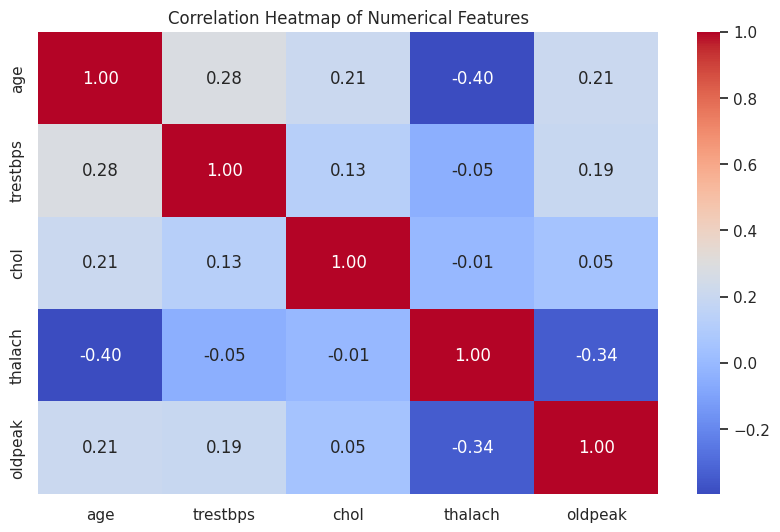

In [ ]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## 3D Scatter Plot: Age vs Thalach vs Oldpeak (Colored by Target)  
#### **Conclusions:**  
- **Visual Relationship:**  
  - Individuals with **heart disease (target=1, red points)** cluster around regions with **higher thalach** and **lower oldpeak**, for a given age.  
  - Individuals without heart disease (target=0, blue points) are more spread out, with many having **lower thalach** and **higher oldpeak** values.  

- **Interaction Between Variables:**  
  - This 3D visualization highlights how **age, thalach, and oldpeak interact together** to differentiate between the two groups.  
  - The separation between target groups becomes more noticeable in 3D compared to looking at only pairs of variables.  


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='age',
    y='thalach',
    z='oldpeak',
    color='target',
    title="3D Scatter Plot: Age vs Thalach vs Oldpeak (colored by Target)",
    color_discrete_map={0: 'blue', 1: 'red'},
    opacity=0.7,
    size_max=8
)

fig.update_traces(marker=dict(size=5))
fig.show()



## Parallel Coordinates Plot

- **Age:** Heavy overlap → not a strong differentiator.  
- **Trestbps:** Slightly higher for target=1, but weak signal.  
- **Chol:** Overlaps mostly; extreme highs seen in target=1.  
- **Thalach:** Higher for target=1 (good predictor).  
- **Oldpeak:** Lower for target=1 (good predictor).

**Thalach + Oldpeak stand out as strongest indicators.**


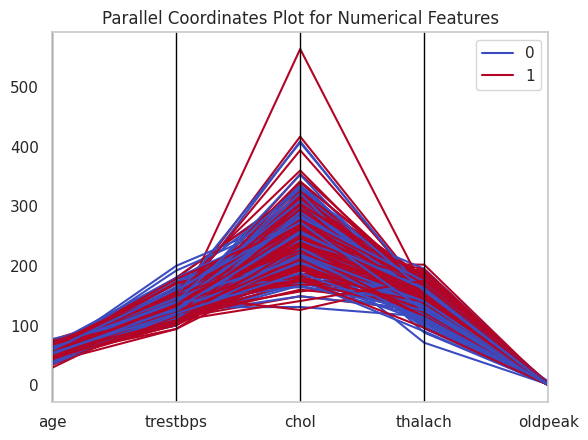

In [ ]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df[['age','trestbps','chol','thalach','oldpeak','target']],
                     'target', colormap='coolwarm')
plt.title("Parallel Coordinates Plot for Numerical Features")
plt.show()


### **Key Predictive Features (Summary)**  

- **thalach** – Strongest indicator; higher thalach often linked with heart disease.  
- **oldpeak** – Lower values tend to associate with heart disease.  
- **cp** – Chest pain type is highly discriminative.  
- **ca** – Number of major vessels strongly separates target groups.  
- **exang** – Exercise-induced angina provides useful signal (dataset-specific; include but validate its direction in modeling).  
- **thal** – Thalassemia category shows clear differences between heart disease and non-heart disease groups.  

> **In short:** `thalach`, `oldpeak`, `cp`, `ca`, `exang`, and `thal` are the most useful features for predicting heart disease, especially when combined with age.
